In [25]:
import warnings
warnings.simplefilter('ignore')

%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
import numpy as np
import pandas as pd
import seaborn as sns
sns.set('notebook')
from __future__ import division
import statsmodels.api as sm
plt.rcParams['figure.figsize'] = (18,8)
plt.rcParams['axes.titlesize'] = 40
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['xtick.labelsize'] = 15
%config InlineBackend.figure_format = 'retina'

## 2004 to 2018

In [26]:
iqutos_FAP = pd.read_excel('aero_iquitos_FAP.xls',sheet_name='rptaniomes3',nrows=12,
                           skiprows=4,index_col=0,)
print(iqutos_FAP.columns.size)
iqutos_FAP.columns

47


Index(['Doméstico', 'Internacional', 'Total', 'Doméstico.1', 'Internacional.1',
       'Total.1', 'Doméstico.2', 'Internacional.2', 'Unnamed: 9',
       'Unnamed: 10', 'Total.2', 'Doméstico.3', 'Internacional.3', 'Total.3',
       'Doméstico.4', 'Internacional.4', 'Total.4', 'Doméstico.5',
       'Internacional.5', 'Total.5', 'Doméstico.6', 'Internacional.6',
       'Total.6', 'Doméstico.7', 'Internacional.7', 'Total.7', 'Doméstico.8',
       'Internacional.8', 'Total.8', 'Doméstico.9', 'Internacional.9',
       'Total.9', 'Doméstico.10', 'Internacional.10', 'Total.10',
       'Doméstico.11', 'Internacional.11', 'Total.11', 'Doméstico.12',
       'Internacional.12', 'Total.12', 'Doméstico.13', 'Internacional.13',
       'Total.13', 'Doméstico.14', 'Internacional.14', 'Total.14'],
      dtype='object')

In [27]:
iqutos_FAP.dropna(axis=1,inplace=True)
iqutos_FAP = iqutos_FAP.drop(iqutos_FAP.columns[iqutos_FAP.columns.str.contains('Total')],axis=1)
print(iqutos_FAP.columns.size)
iqutos_FAP.columns

28


Index(['Doméstico', 'Internacional', 'Doméstico.1', 'Internacional.1',
       'Doméstico.2', 'Internacional.2', 'Doméstico.3', 'Internacional.3',
       'Doméstico.4', 'Internacional.4', 'Doméstico.5', 'Internacional.5',
       'Doméstico.6', 'Internacional.6', 'Doméstico.7', 'Internacional.7',
       'Doméstico.8', 'Internacional.8', 'Doméstico.9', 'Internacional.9',
       'Doméstico.10', 'Internacional.10', 'Doméstico.11', 'Internacional.11',
       'Doméstico.12', 'Internacional.12', 'Doméstico.13', 'Internacional.13'],
      dtype='object')

In [28]:
iqutos_FAP.head()

,Doméstico,Internacional,Doméstico.1,Internacional.1,Doméstico.2,Internacional.2,Doméstico.3,Internacional.3,Doméstico.4,Internacional.4,...,Doméstico.9,Internacional.9,Doméstico.10,Internacional.10,Doméstico.11,Internacional.11,Doméstico.12,Internacional.12,Doméstico.13,Internacional.13
Enero,28822,360,32605,151,31327,148,40428,52,42190,14,...,70786,461,81146,782,98316,848,90916,0,85915,0
Febrero,29726,176,32260,644,31819,5,42795,584,46428,201,...,73173,494,78689,1282,95931,856,86757,0,82169,0
Marzo,30758,164,35746,627,32829,9,47506,32,46876,10,...,71404,492,76894,1542,87289,873,76759,0,75312,0
Abril,27026,330,29495,695,29282,9,38321,129,39943,138,...,60304,331,65828,1862,78133,893,68944,0,68176,0
Mayo,26447,127,28853,0,29228,0,39179,0,41626,127,...,65520,620,69645,1982,82050,1111,72753,0,72053,0


In [29]:
list_df = []
dic = dict(Enero=1,Febrero=2,Marzo=3,Abril=4,Mayo=5,Junio=6,Julio=7,
           Agosto=8,Septiembre=9,Octubre=10,Noviembre=11,Diciembre=12)
year = 2004

In [30]:
for enum,col in enumerate(np.arange(0,iqutos_FAP.columns.size,2)):
    airport = iqutos_FAP.iloc[:,[col,col+1]].copy()
    airport['Date'] = airport.index.map(dic)
    airport.Date = airport.apply(lambda row: pd.datetime(year+enum, row['Date'],1), axis=1)
    airport = airport.set_index('Date')
    airport.append(airport)
    airport.columns = ['Domestic','International']
    list_df.append(airport)
    
df_iquitos = pd.concat(list_df)
df_iquitos.sample(4)

,Domestic,International
Date,,
2016-08-01,84458,0
2006-12-01,40728,5
2008-10-01,46017,0
2012-09-01,58749,347


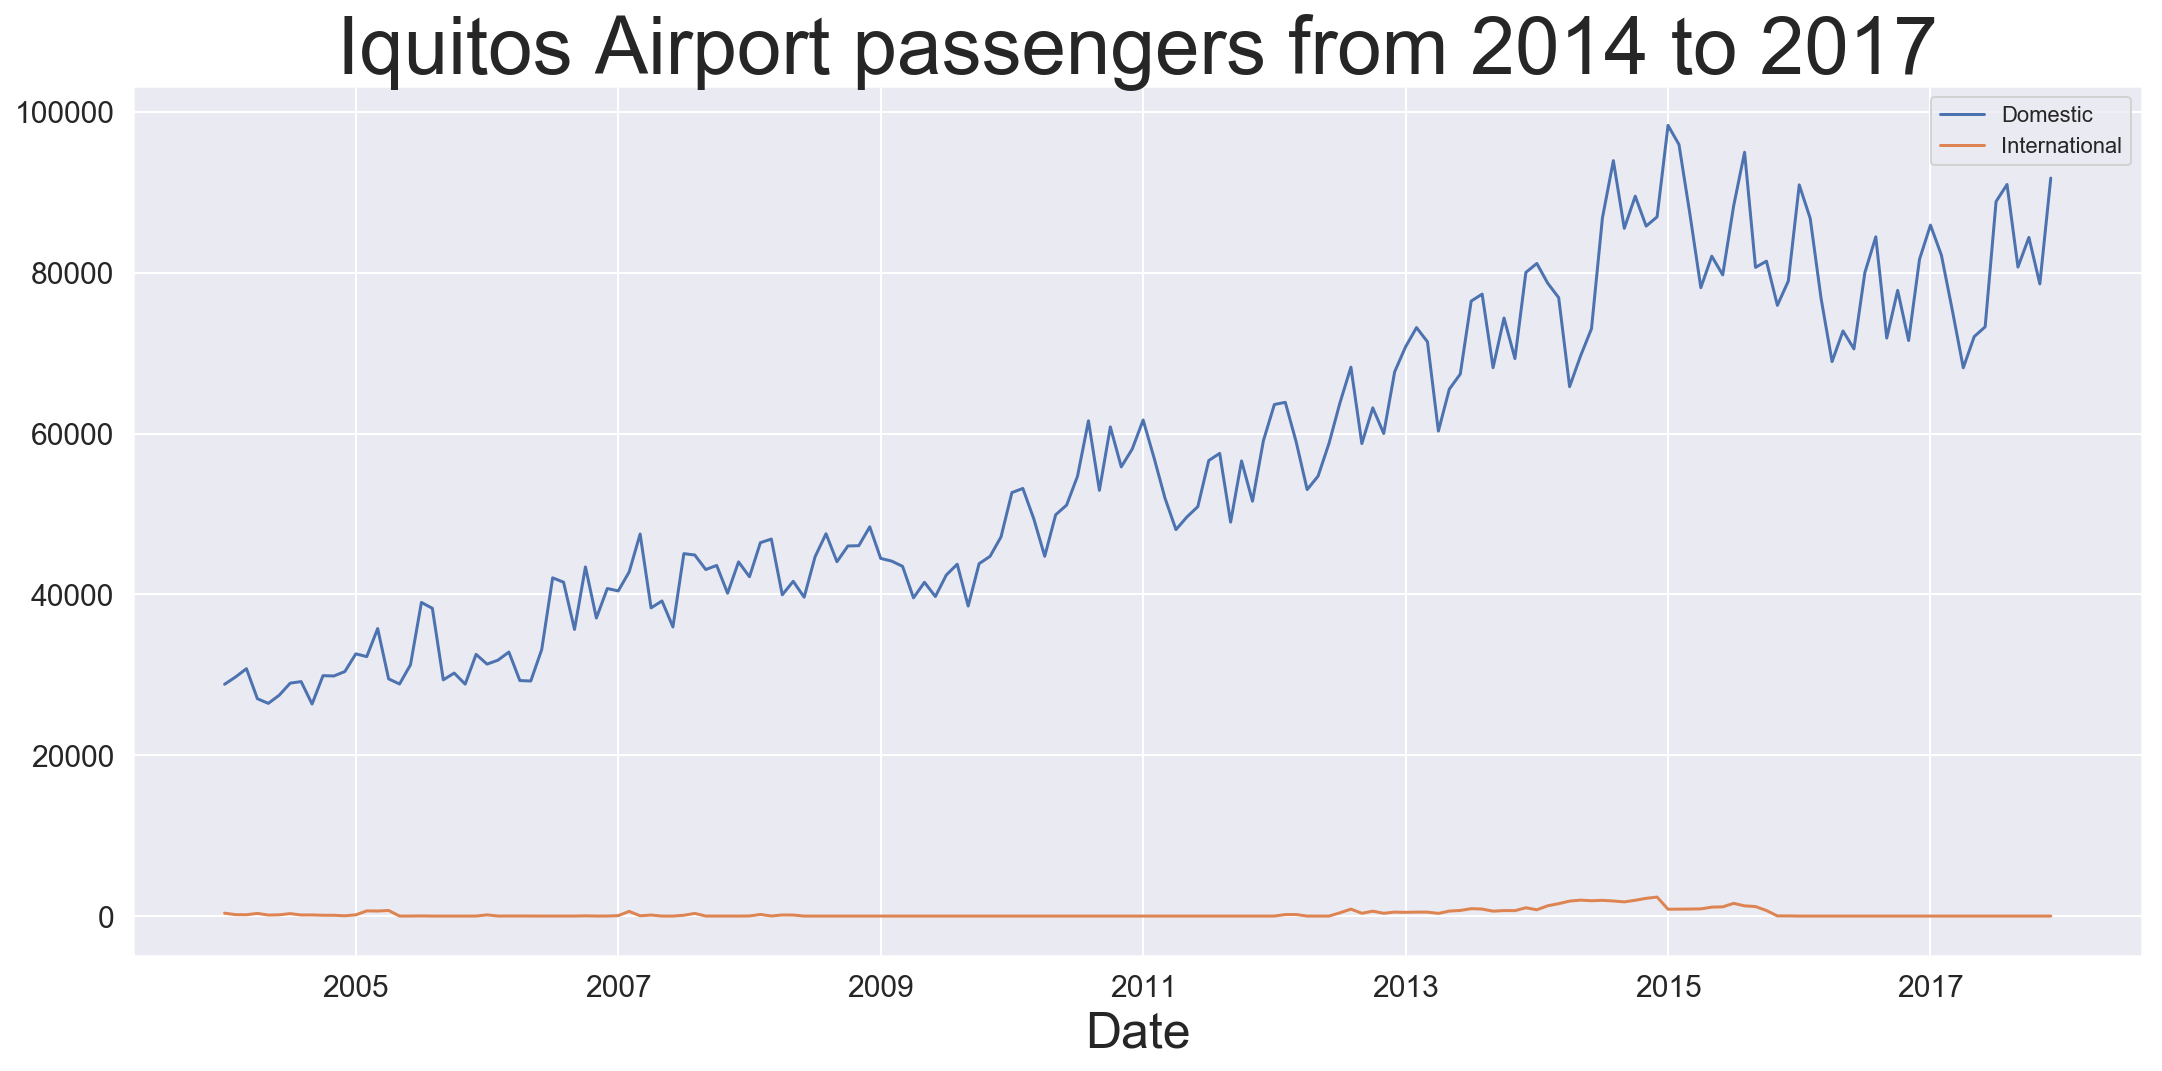

In [31]:
df_iquitos.plot()
plt.title('Iquitos Airport passengers from 2014 to 2017')
plt.show();

In [32]:
def clean_excel_to_dataframe(nameExcel,nameSheet):
    df = iqutos_FAP = pd.read_excel(nameExcel,sheet_name=nameSheet,nrows=12,
                           skiprows=4,index_col=0,)
    df.dropna(axis=1,inplace=True)
    df = df.drop(df.columns[df.columns.str.contains('Total')],axis=1)
    list_df = []
    for enum,col in enumerate(np.arange(0,df.columns.size,2)):
        airport = df.iloc[:,[col,col+1]].copy()
        airport['Date'] = airport.index.map(dic)
        airport.Date = airport.apply(lambda row: pd.datetime(year+enum, row['Date'],1), axis=1)
        airport = airport.set_index('Date')
        airport.append(airport)
        airport.columns = ['Domestic','International']
        list_df.append(airport)

    df_clean = pd.concat(list_df)
    return df_clean

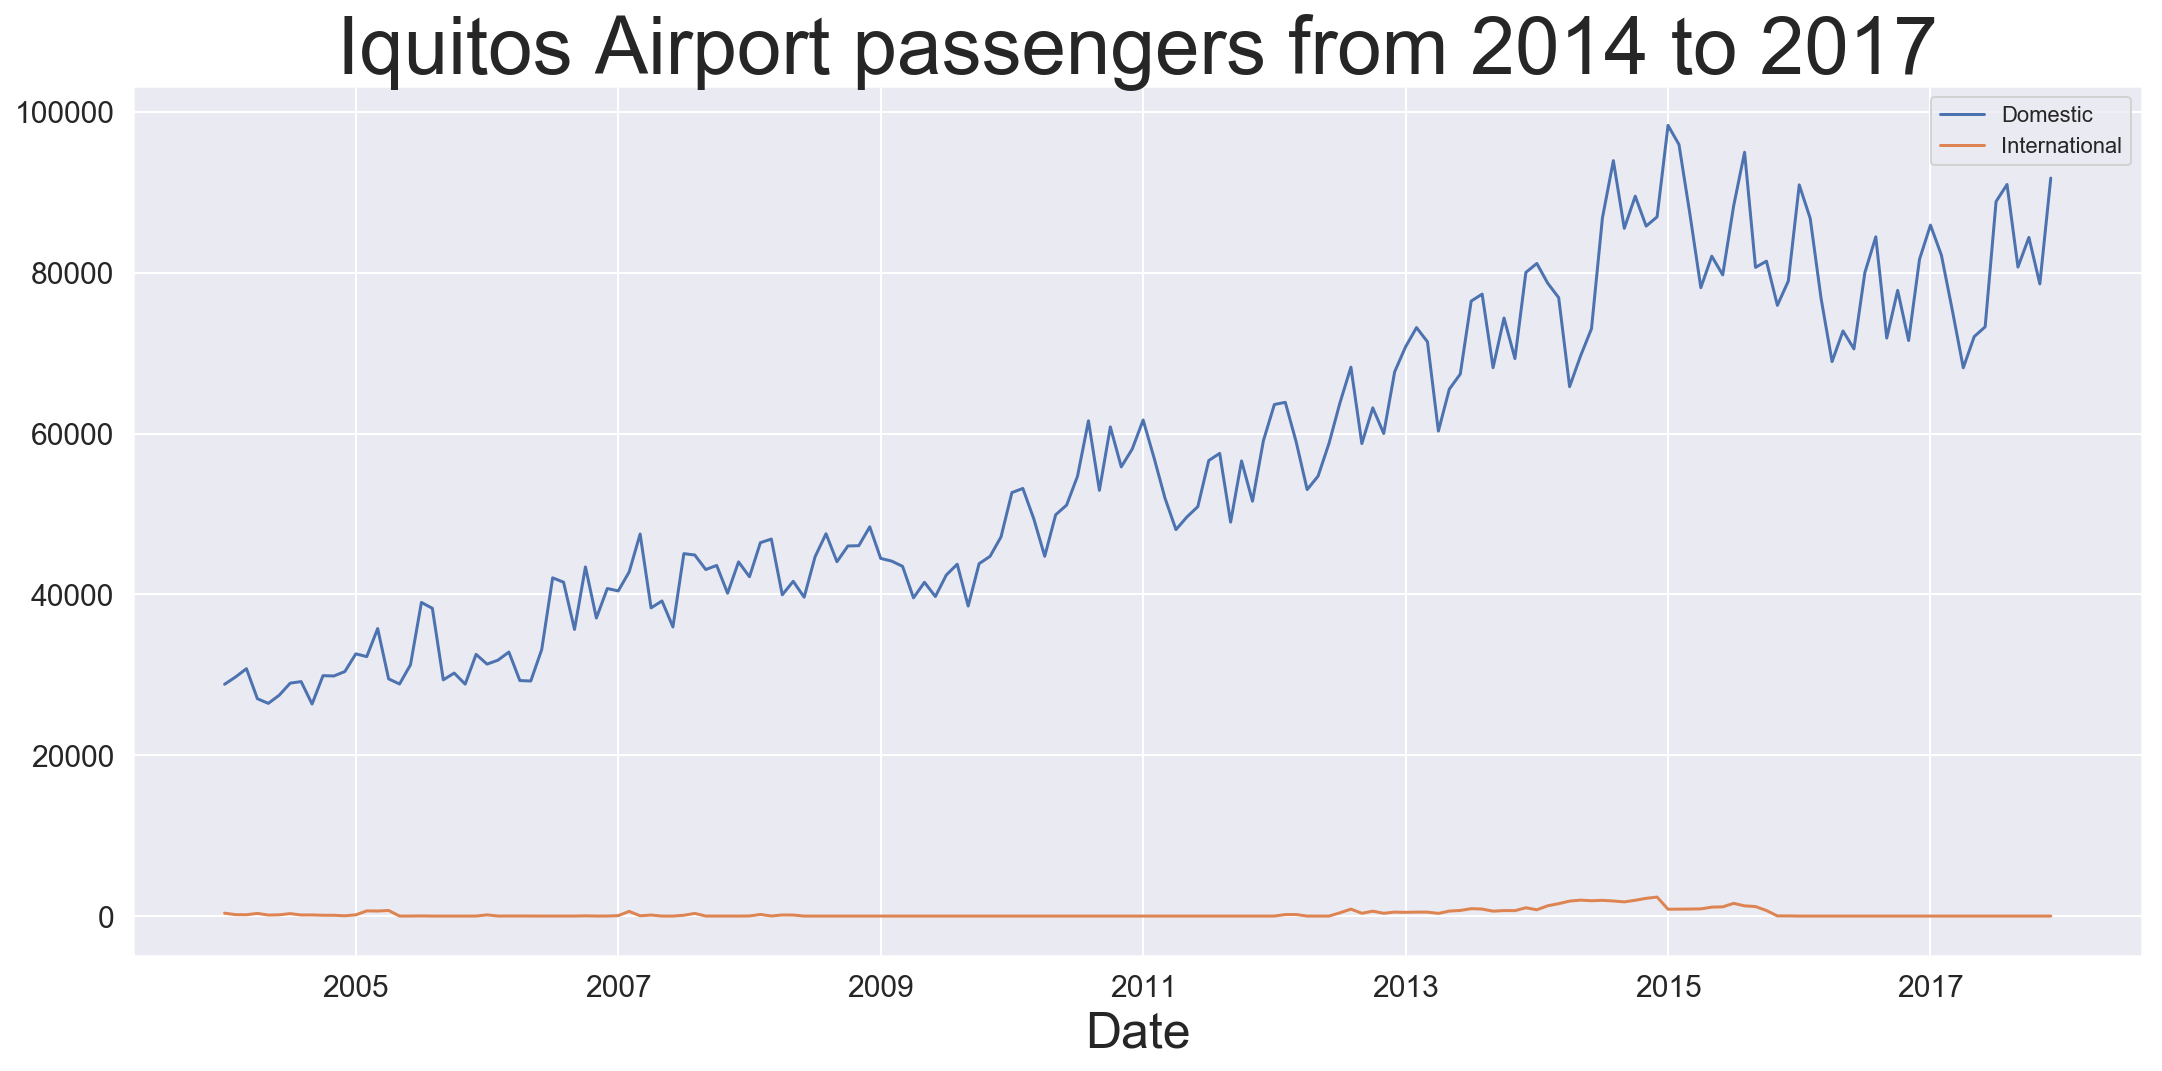

In [48]:
df_iquitos_FAP = clean_excel_to_dataframe('aero_iquitos_FAP.xls','rptaniomes3')
df_iquitos_FAP.plot()
plt.title('Iquitos Airport passengers from 2014 to 2017')
plt.show();

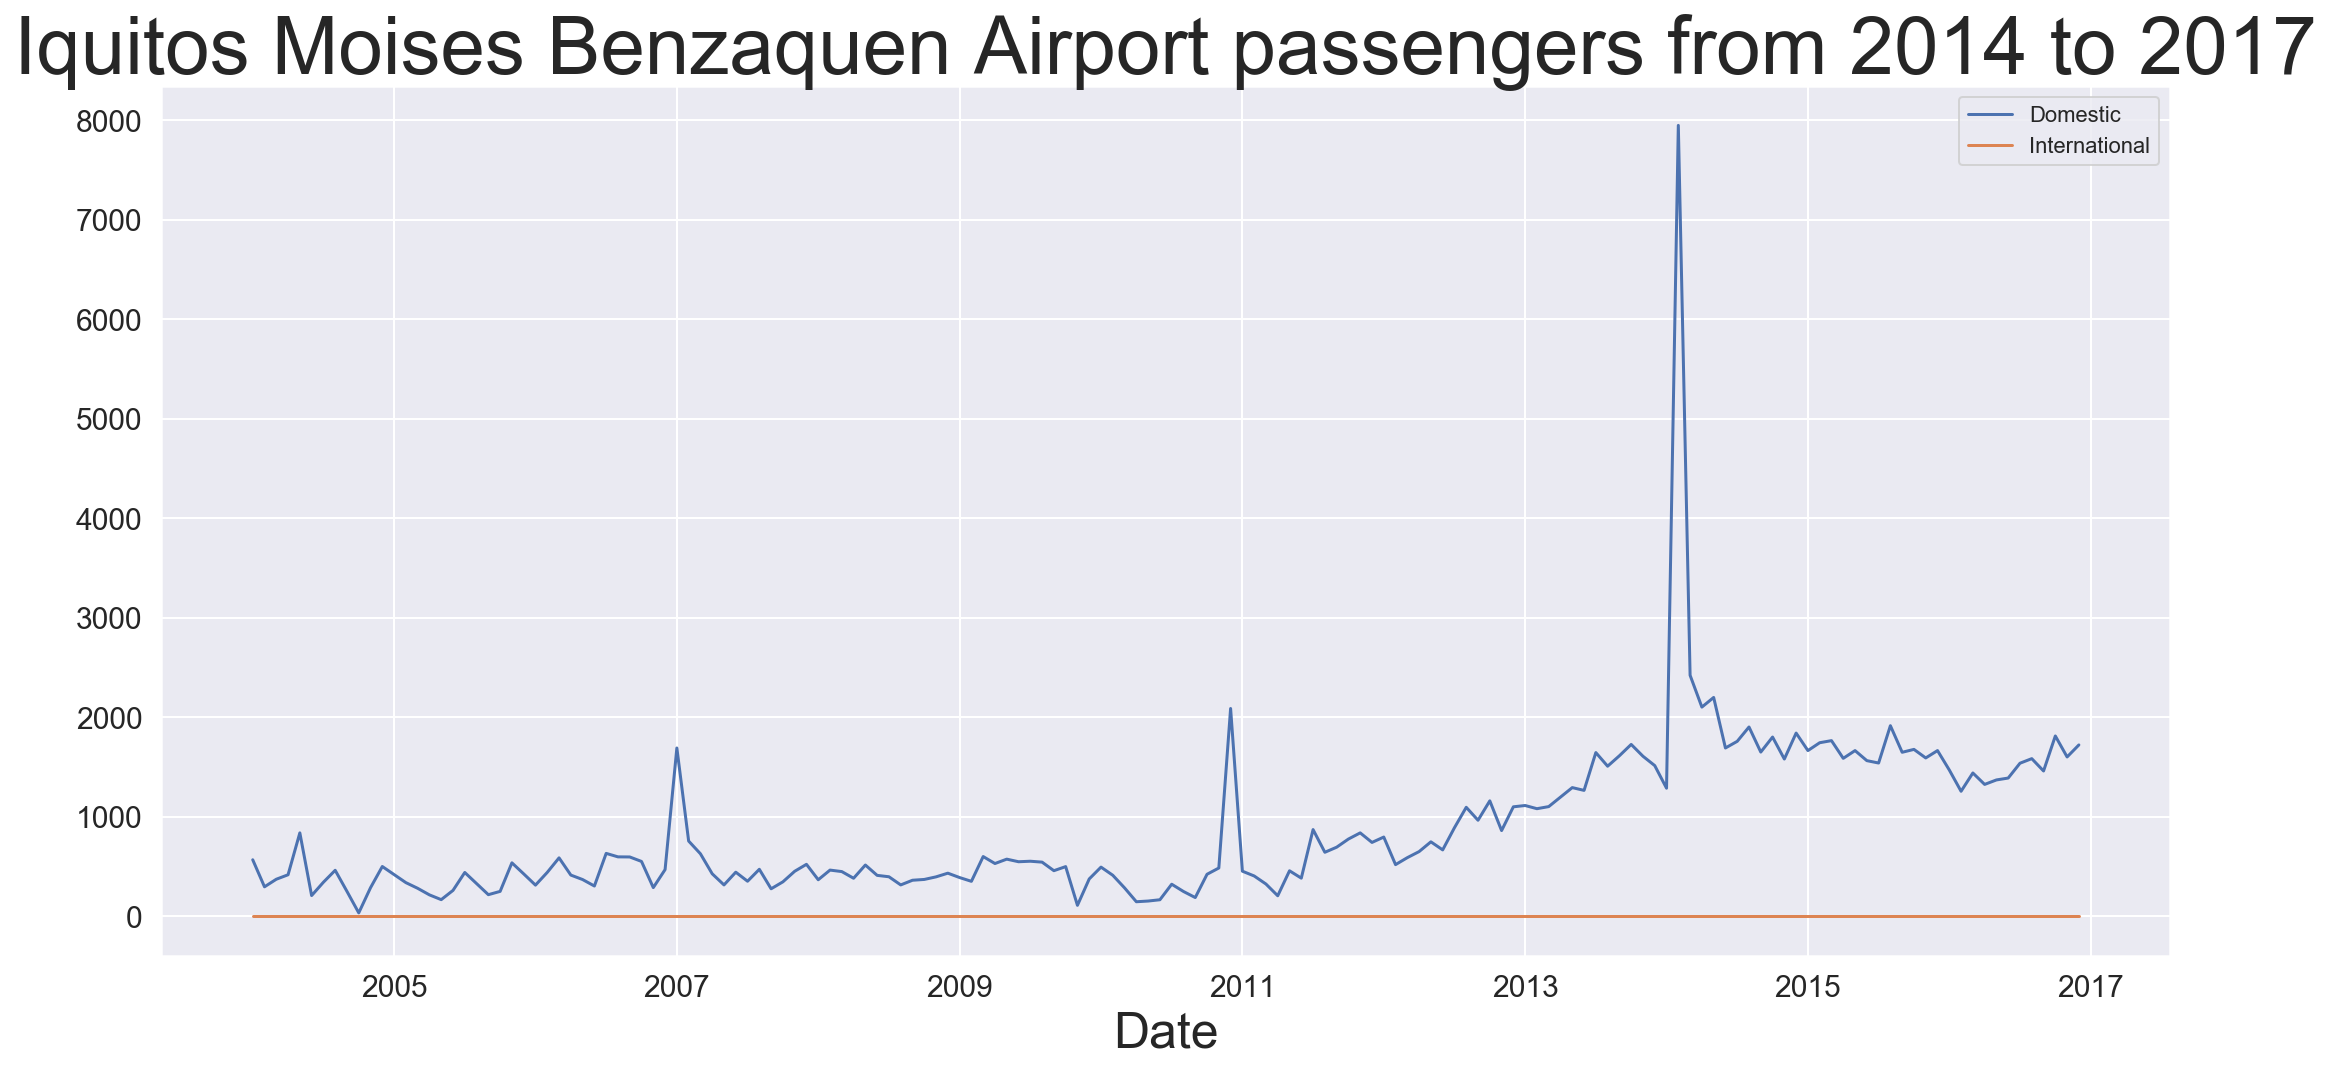

In [49]:
df_iquitos_Moises = clean_excel_to_dataframe('aero_iquitos_moisesBenzaquen.xls','rptaniomes3')
df_iquitos_Moises.plot()
plt.title('Iquitos Moises Benzaquen Airport passengers from 2014 to 2017')
plt.show();

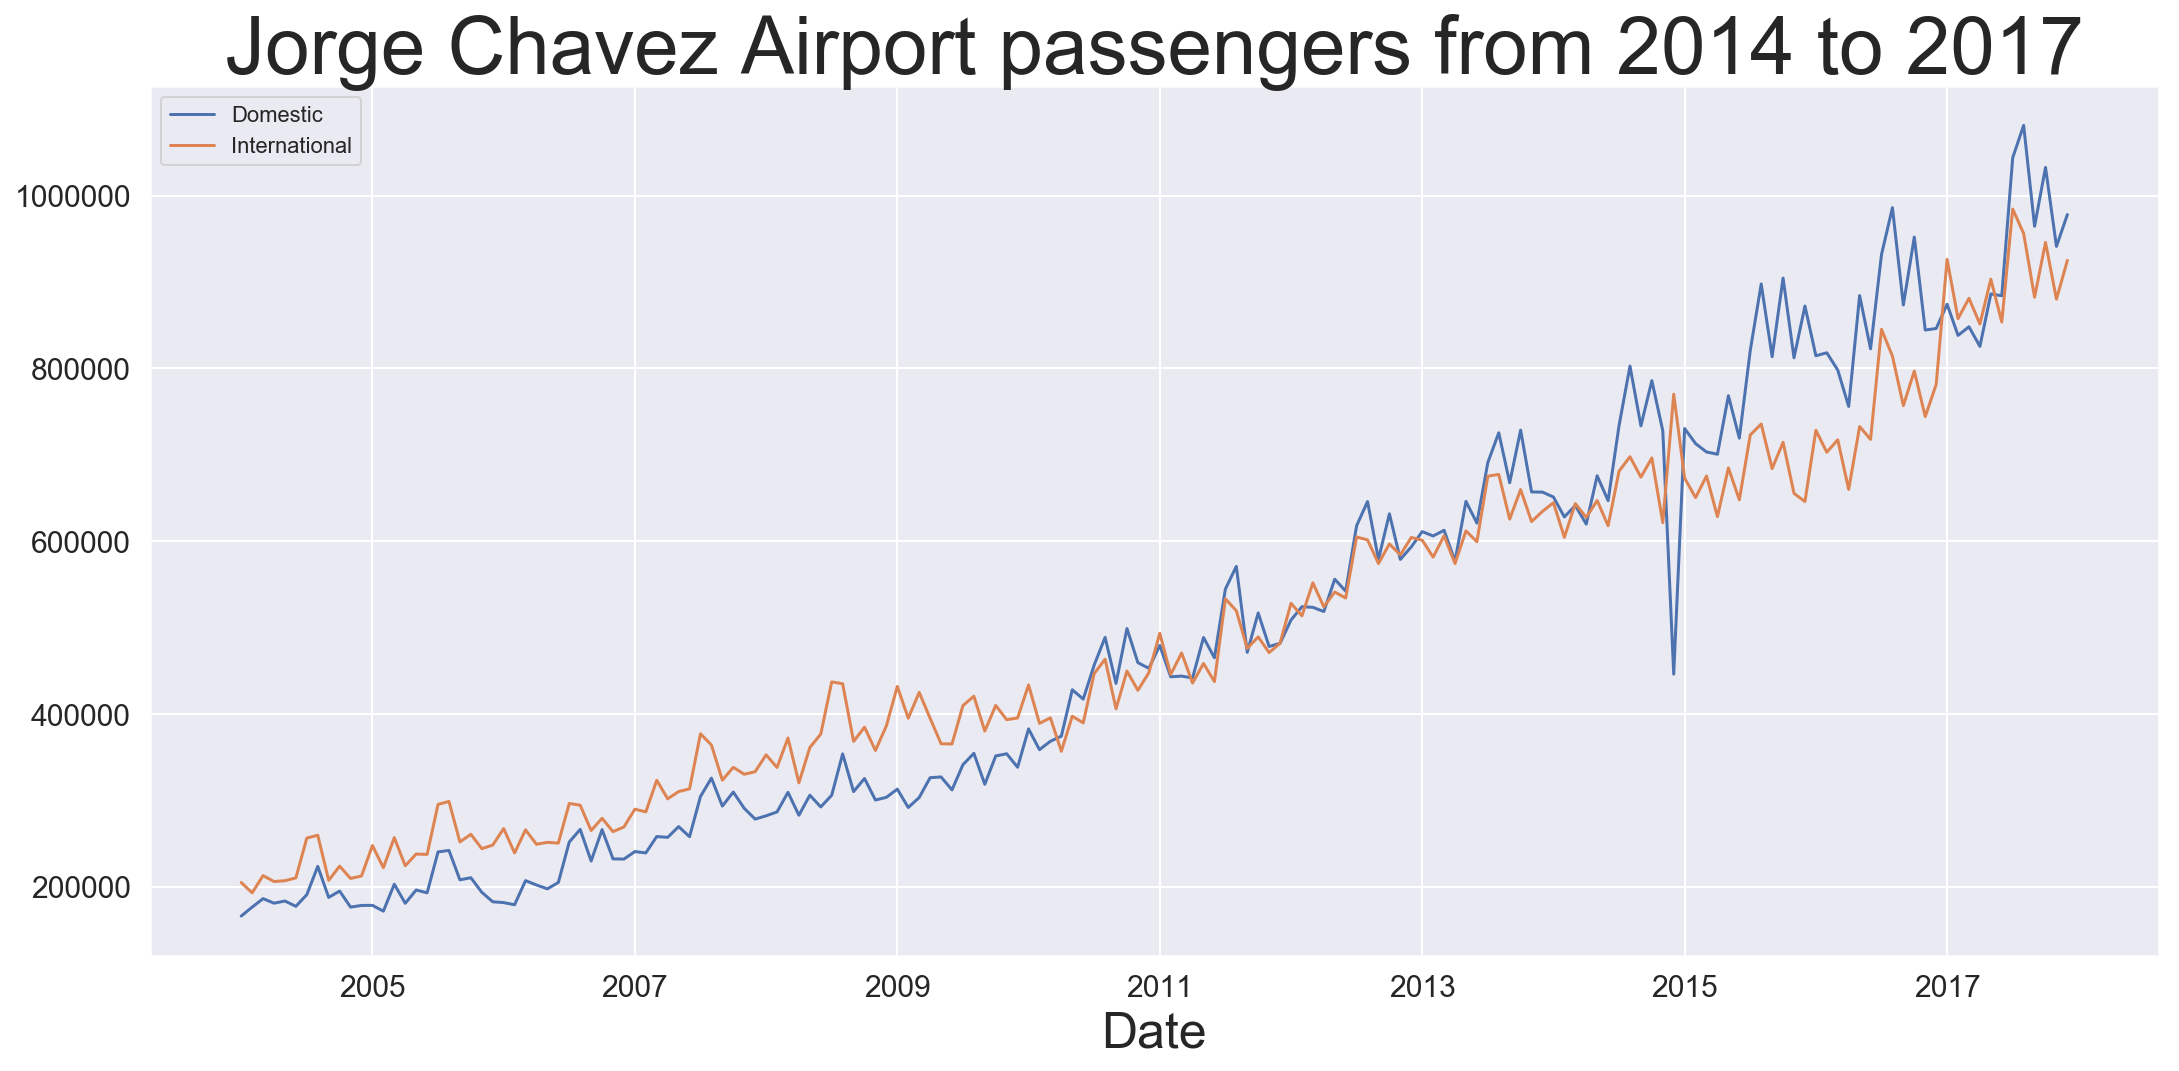

In [50]:
df_lima_jorgechavez = clean_excel_to_dataframe('aero_lima_jorgechavez.xls','rptaniomes3')
df_lima_jorgechavez.plot()
plt.title('Jorge Chavez Airport passengers from 2014 to 2017')
plt.show();

In [36]:
df_iquitos_FAP['airport'] = 'Iquitos_FAP'
df_iquitos_Moises['airport'] = 'Iquitos_Moises'
df_lima_jorgechavez['airport'] ='Lima_Jorge_Chavez'
df_peru_airtport = pd.concat([df_iquitos_FAP,df_iquitos_Moises,df_lima_jorgechavez])
df_peru_airtport['Total'] = df_peru_airtport['Domestic'] + df_peru_airtport['International']

In [37]:
def plot_summary(df,col_name):
    df.groupby('airport')[col_name].plot()
    plt.title('%s Arriving and Livings Passengers'%col_name)
    plt.ylabel('Count of passeners')
    plt.yscale('log')
    plt.legend();

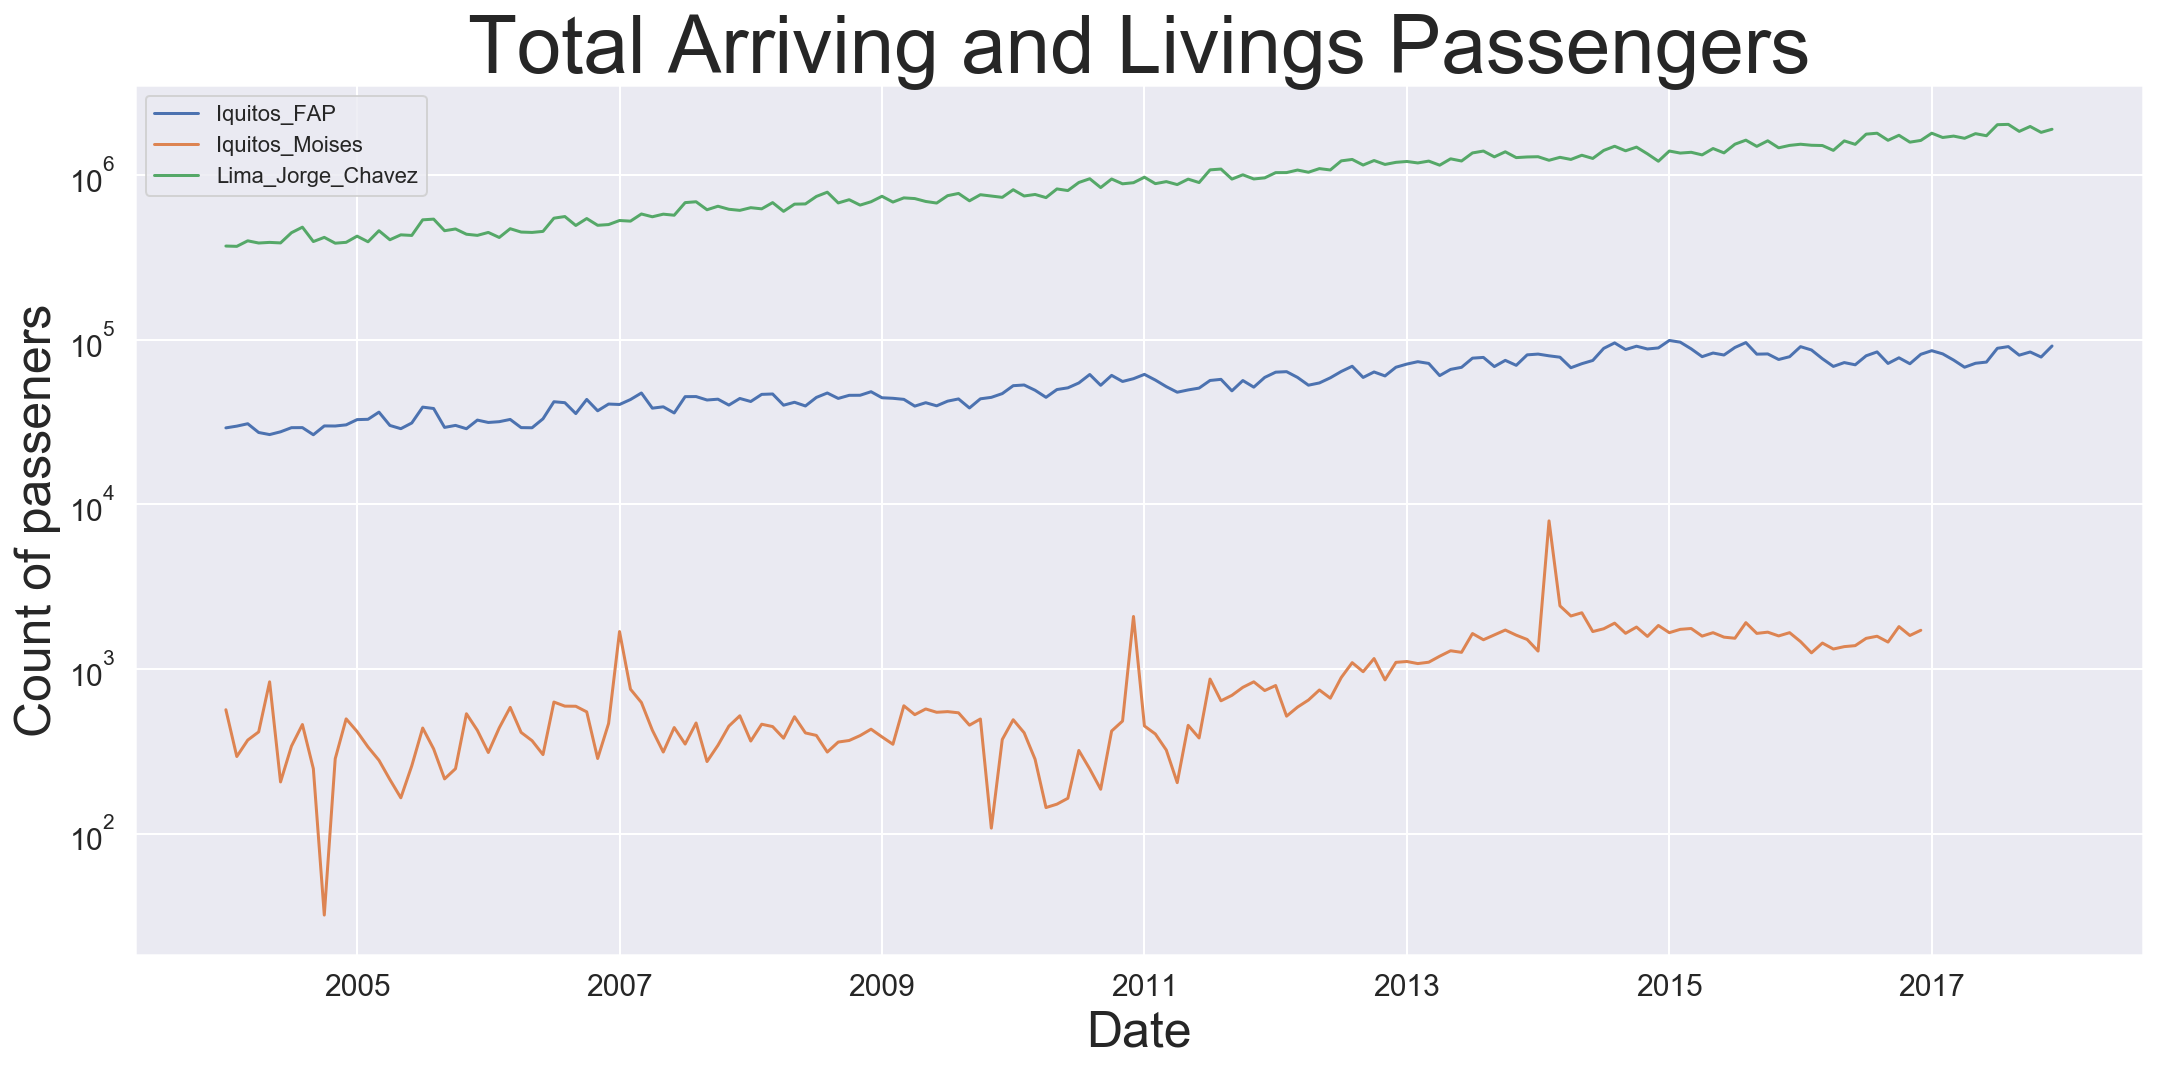

In [38]:
plot_summary(df_peru_airtport,'Total')

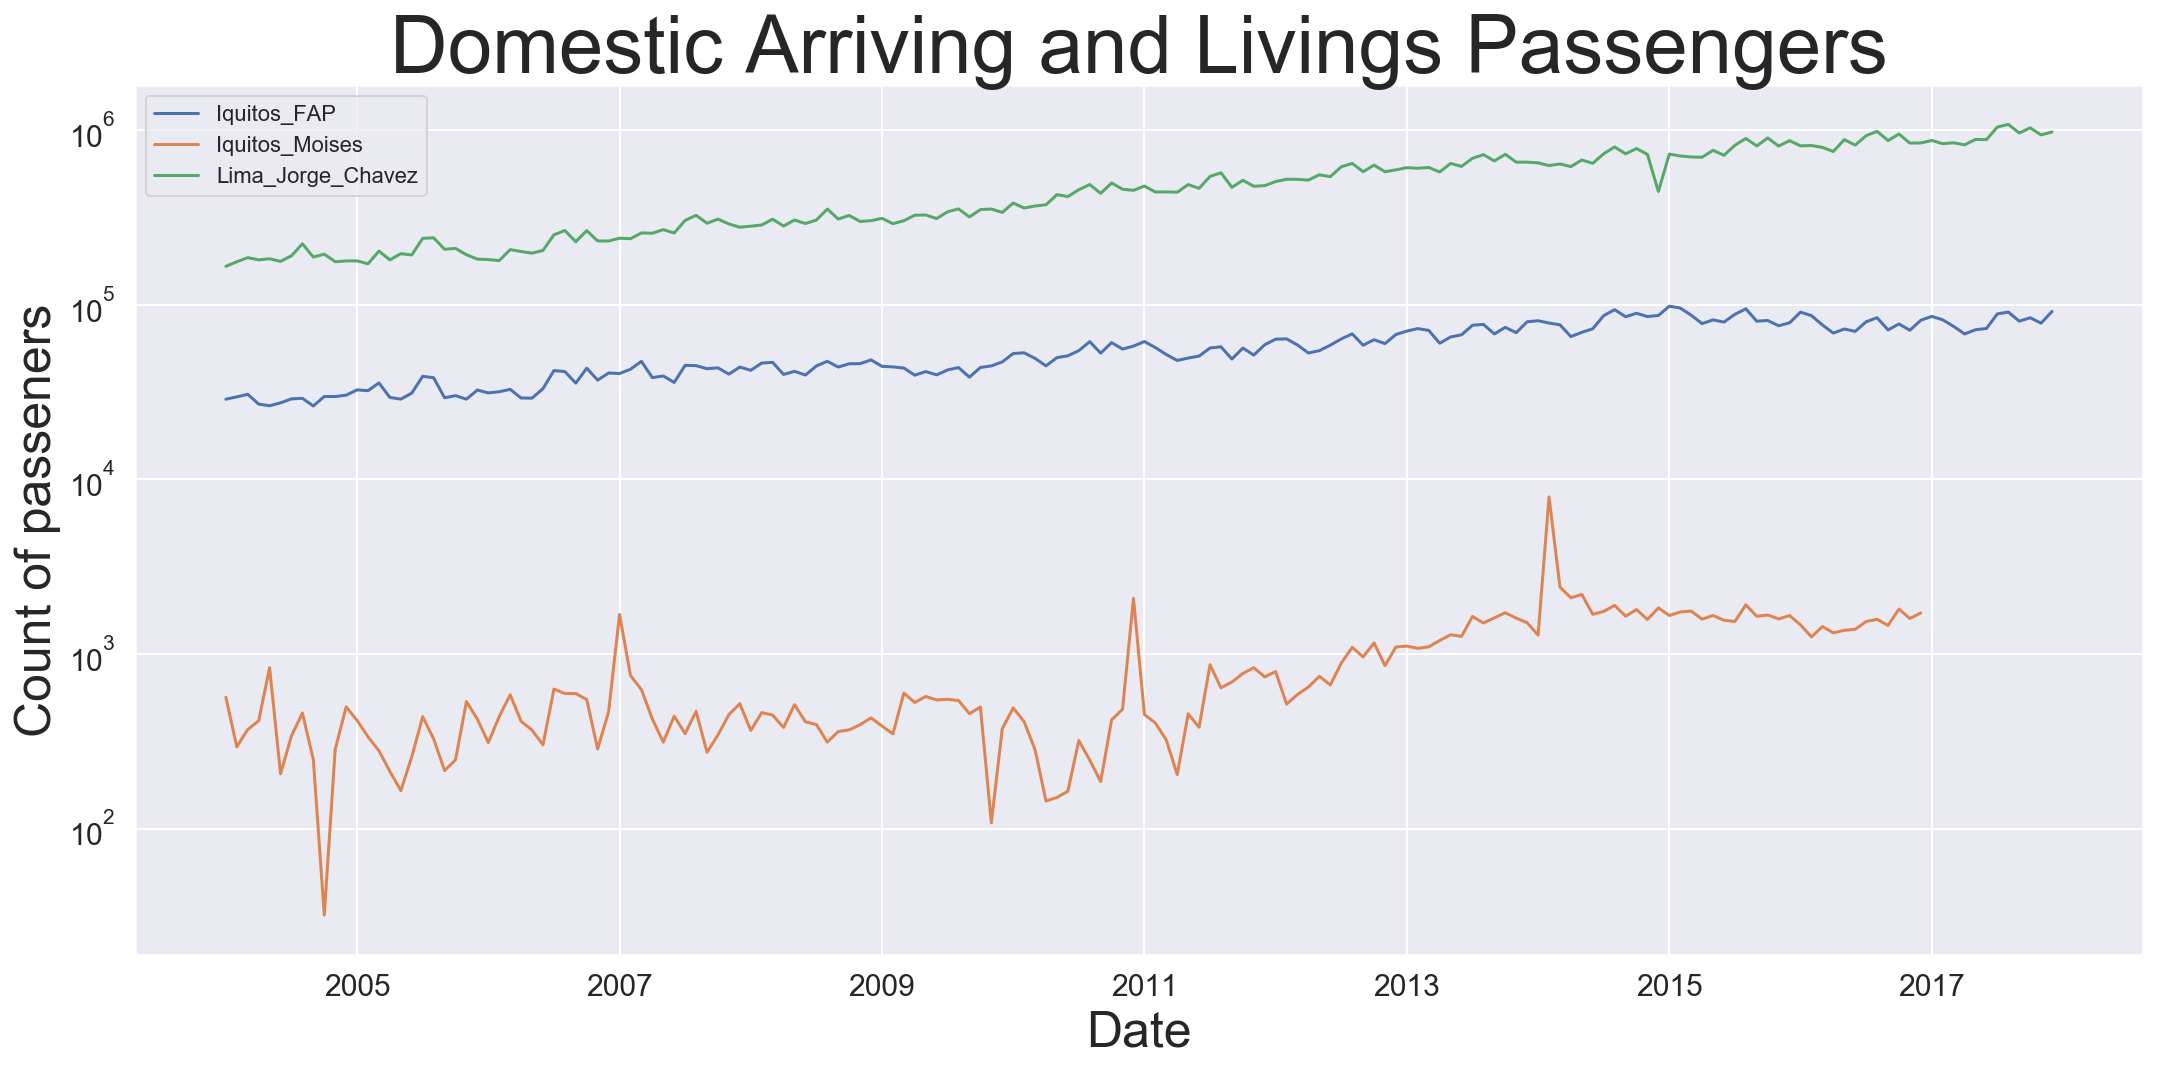

In [39]:
plot_summary(df_peru_airtport,'Domestic')

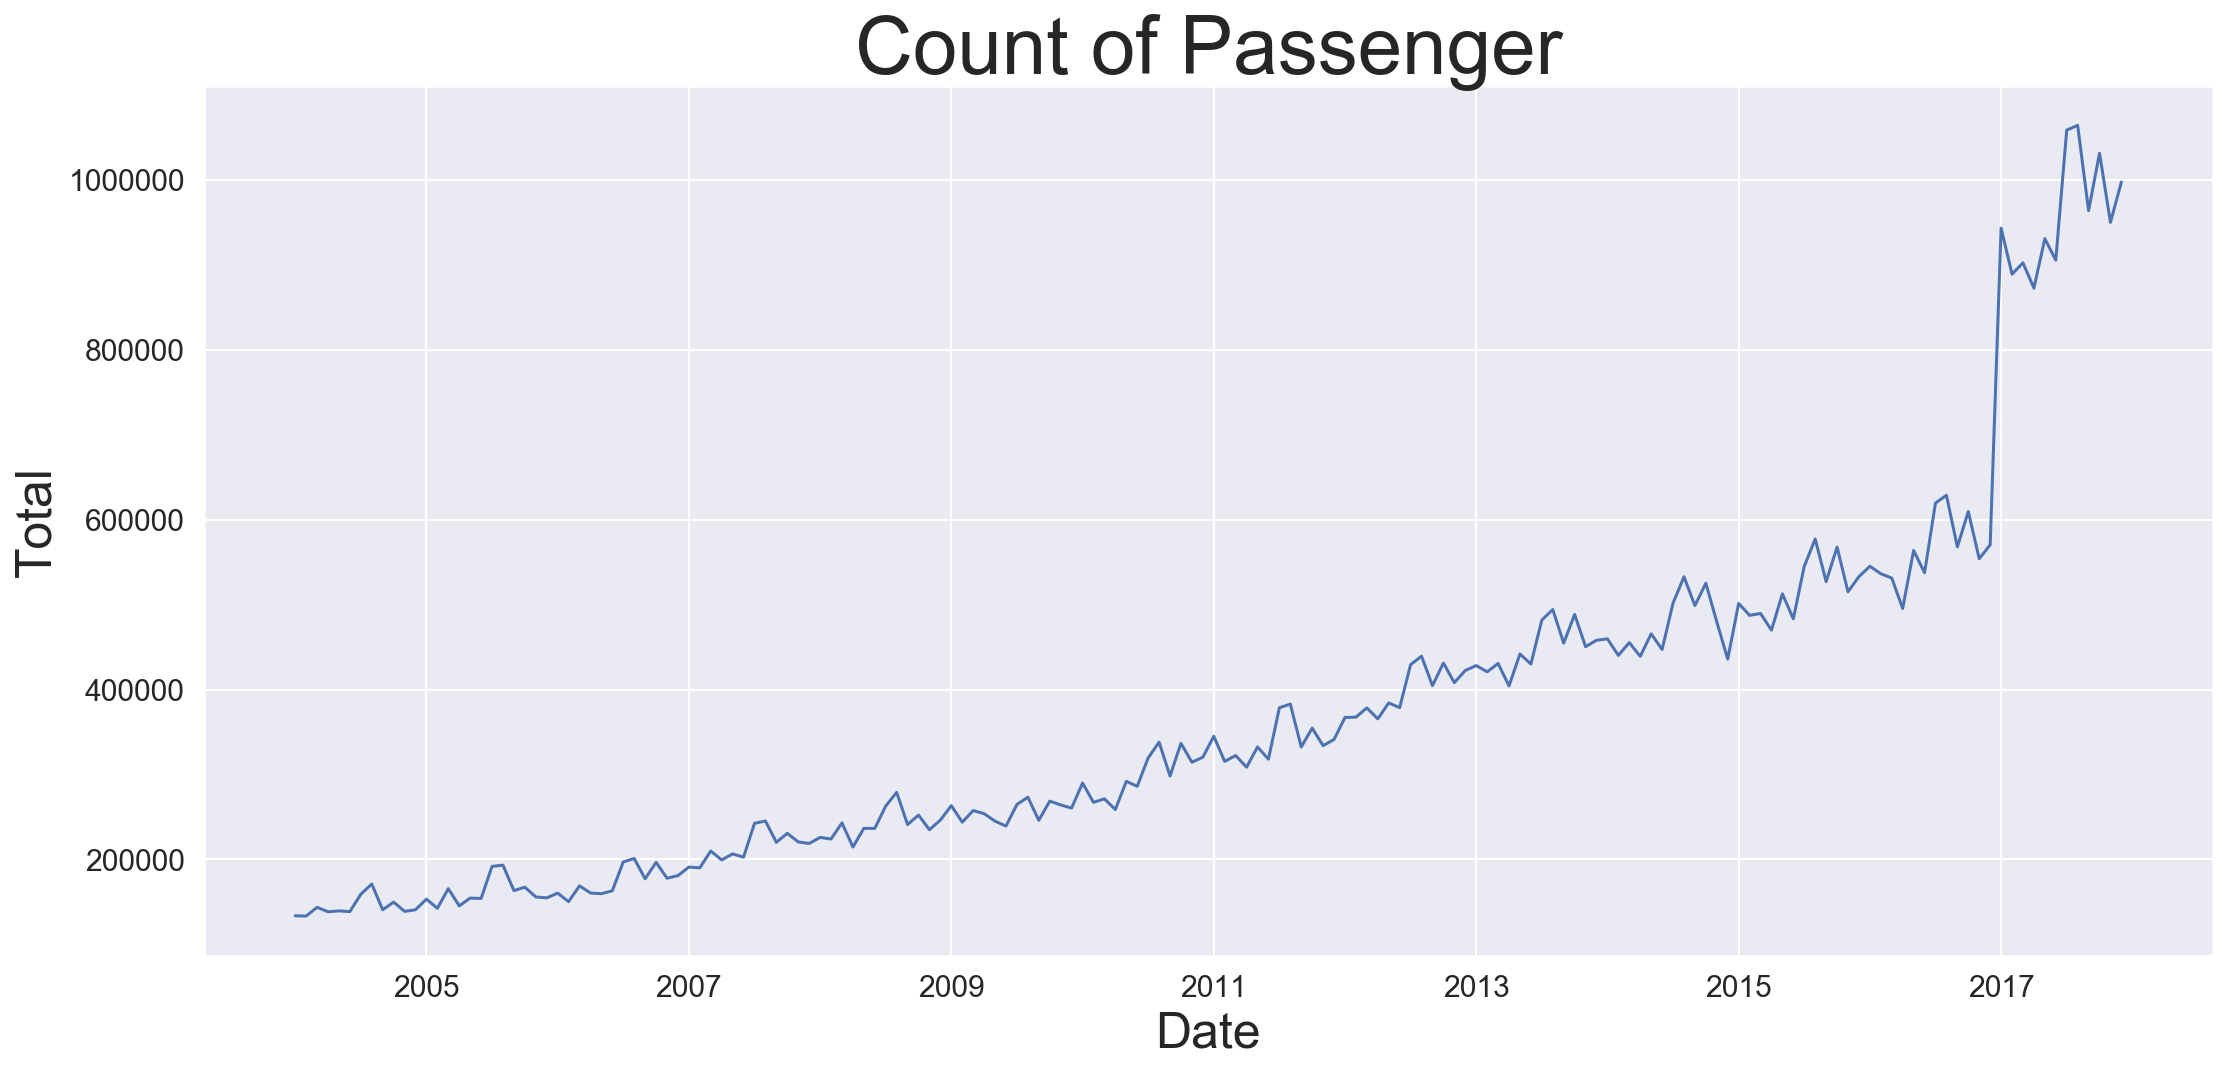

In [51]:
df_peru_airtport_month_mean = df_peru_airtport.Total.resample('m').mean()
df_peru_airtport_month_mean.plot()
plt.title('Count of Passenger')
plt.ylabel('Total');

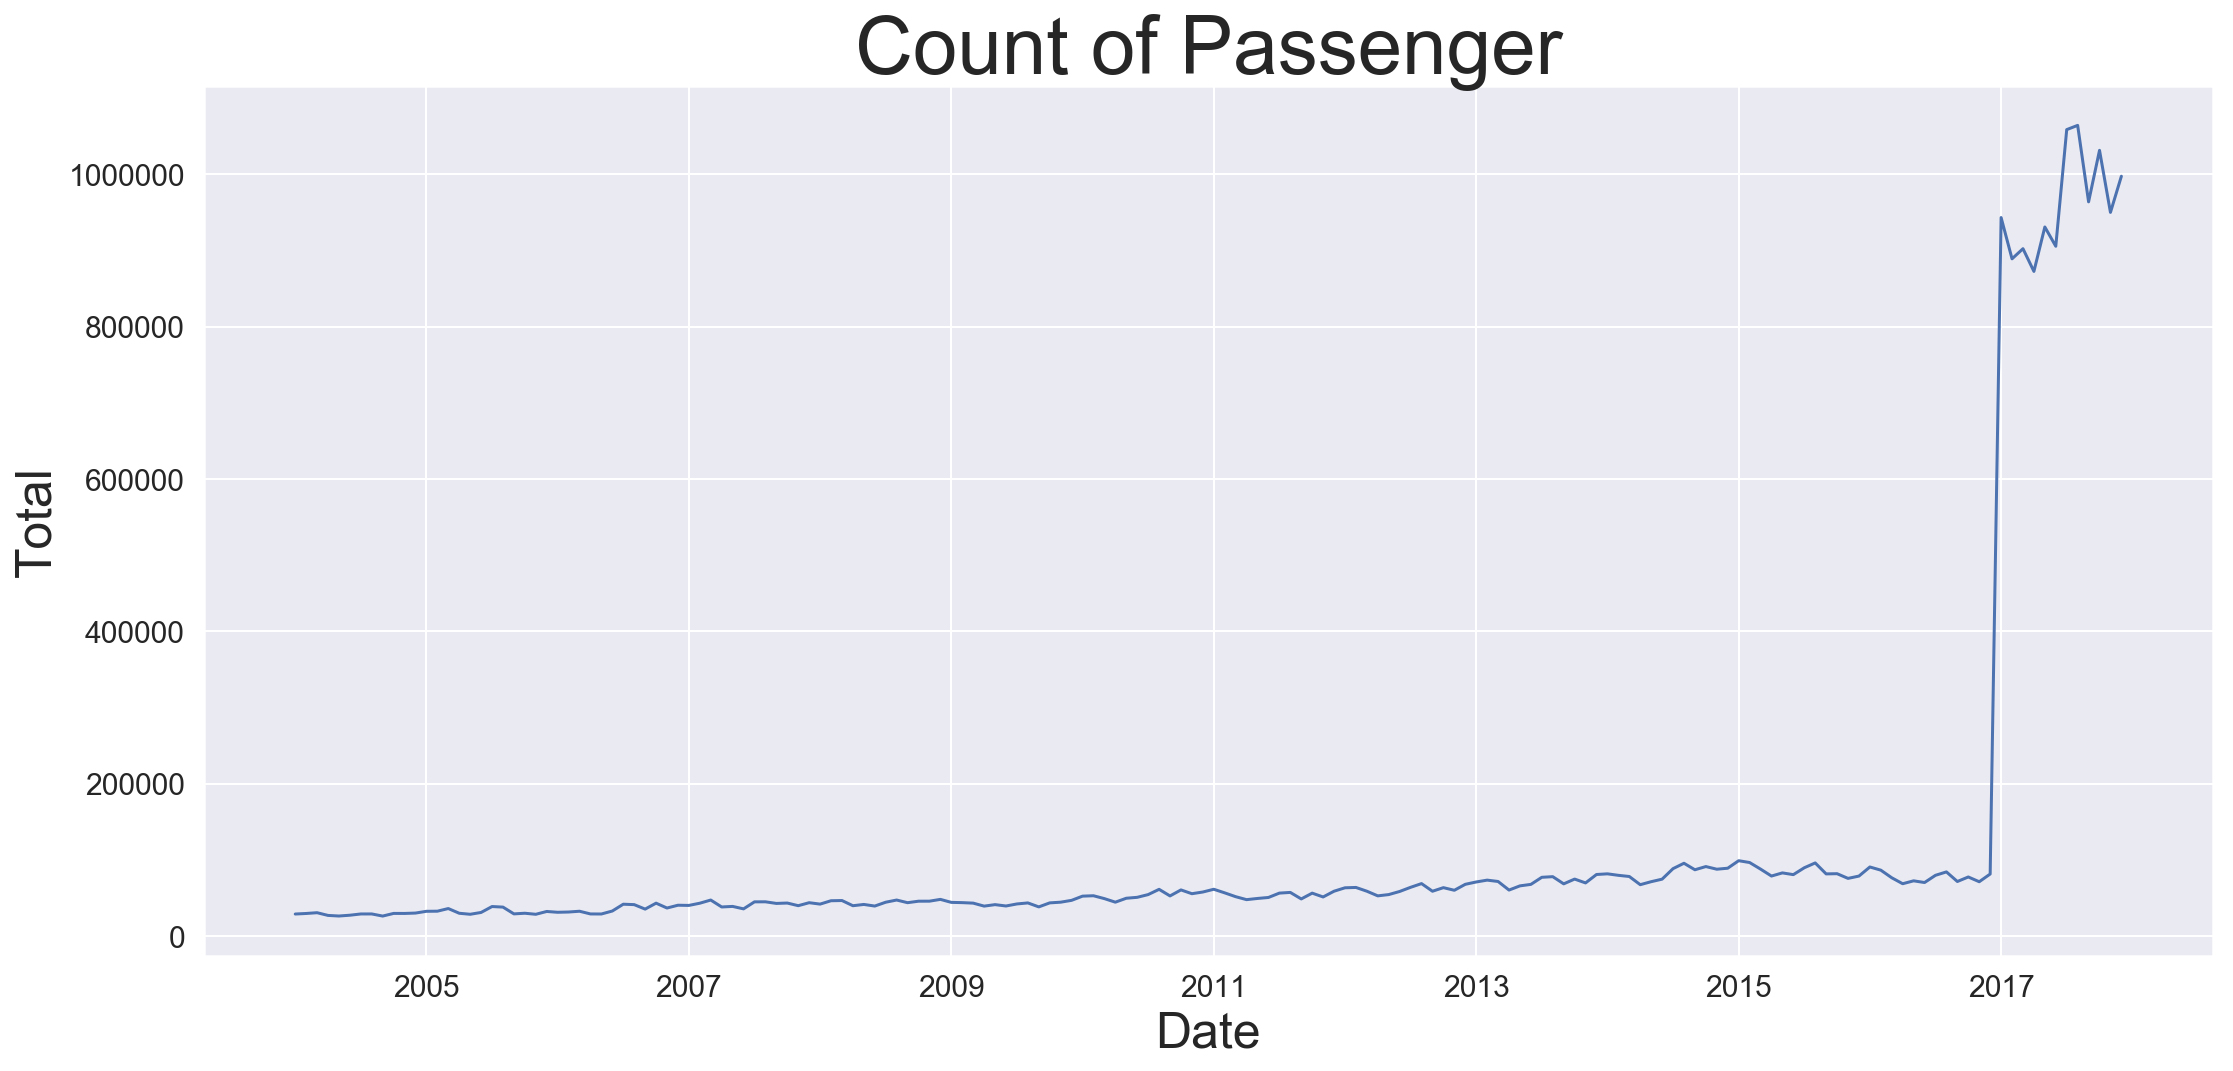

In [52]:
df_peru_airtport_month_median = df_peru_airtport.Total.resample('m').median()
df_peru_airtport_month_median.plot()
plt.title('Count of Passenger')
plt.ylabel('Total');

In [42]:
dic_inv= {v: k for k, v in dic.items()}

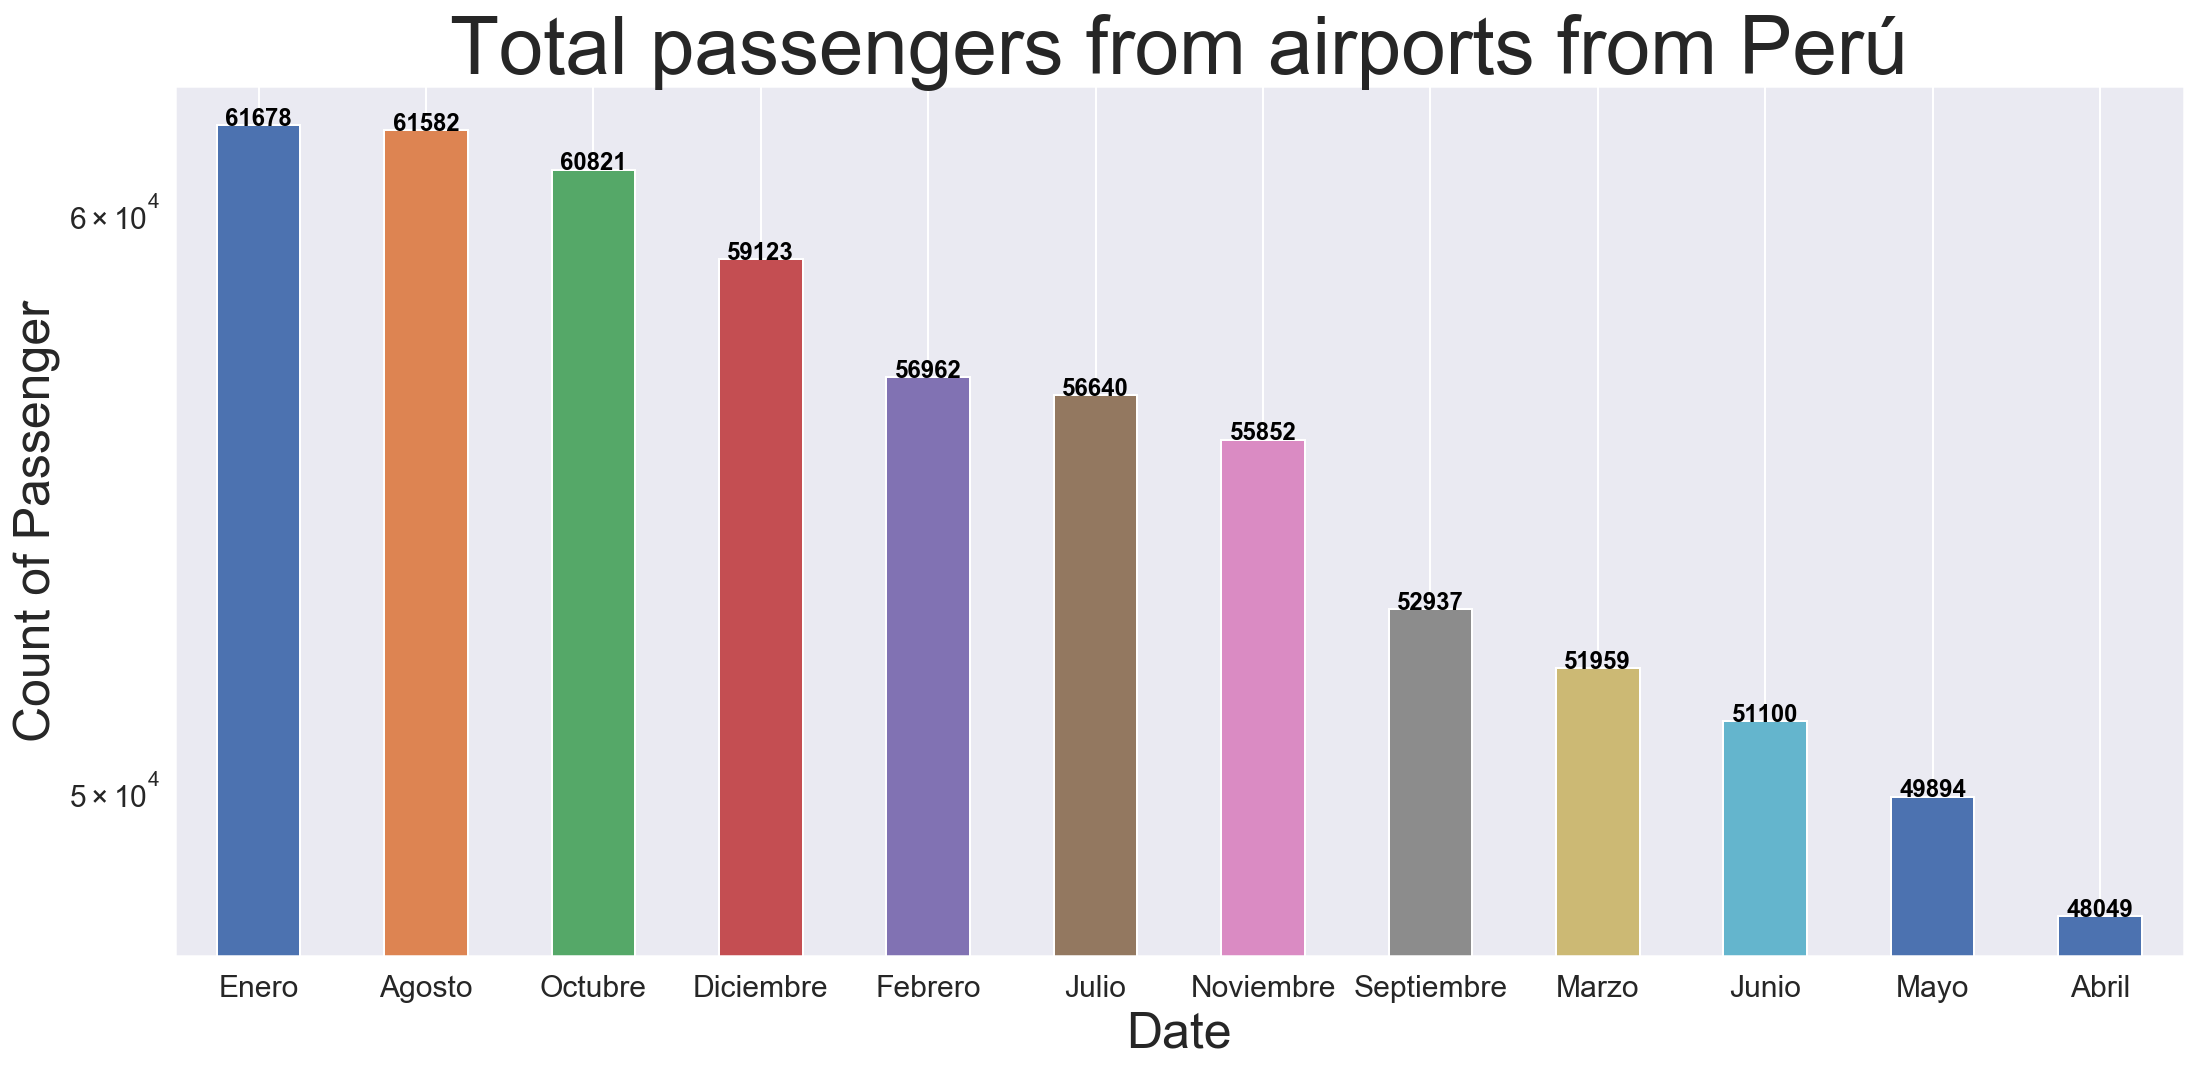

In [80]:
df_peru_airtport_month_median = df_peru_airtport.Total.groupby(
    df_peru_airtport.index.month).median()
df_peru_airtport_month_median.sort_values(ascending=False,inplace=True)
ax=df_peru_airtport_month_median.plot(kind='bar')
for i, v in enumerate(df_peru_airtport_month_median.values):
    ax.text(i-.2 , v , str(v), color='black', fontweight='bold')
plt.yscale('log')
plt.title('Total passengers from airports from Perú')
plt.ylabel('Count of Passenger')
plt.xticks(range(12),[dic_inv[m] 
                      for m in df_peru_airtport_month_median.index],rotation=0);

In [91]:
def plot_summary_best_seasonal_passagers(df, period, period_name,scale='linear'):
    df_ = df['Total'].resample(str(period)+'M').median()
    df_ = df_.groupby(df_.index.month).median()
    df_.sort_values(ascending=False,inplace=True)
    ax = df_.plot(kind='bar')
    for i, v in enumerate(df_.values):
        ax.text(i-.1 , v , str(v), color='black', fontweight='bold')
    plt.title('Median of Arriving and Livings Passengers by %s'%(period_name))
    plt.ylabel('Count of passeners')
    plt.yscale(scale)
    plt.xlabel('')
    plt.xticks(range(12//period),['%s%s'%(period_name,(n//period)+1) for n in df_.index],rotation=0); 

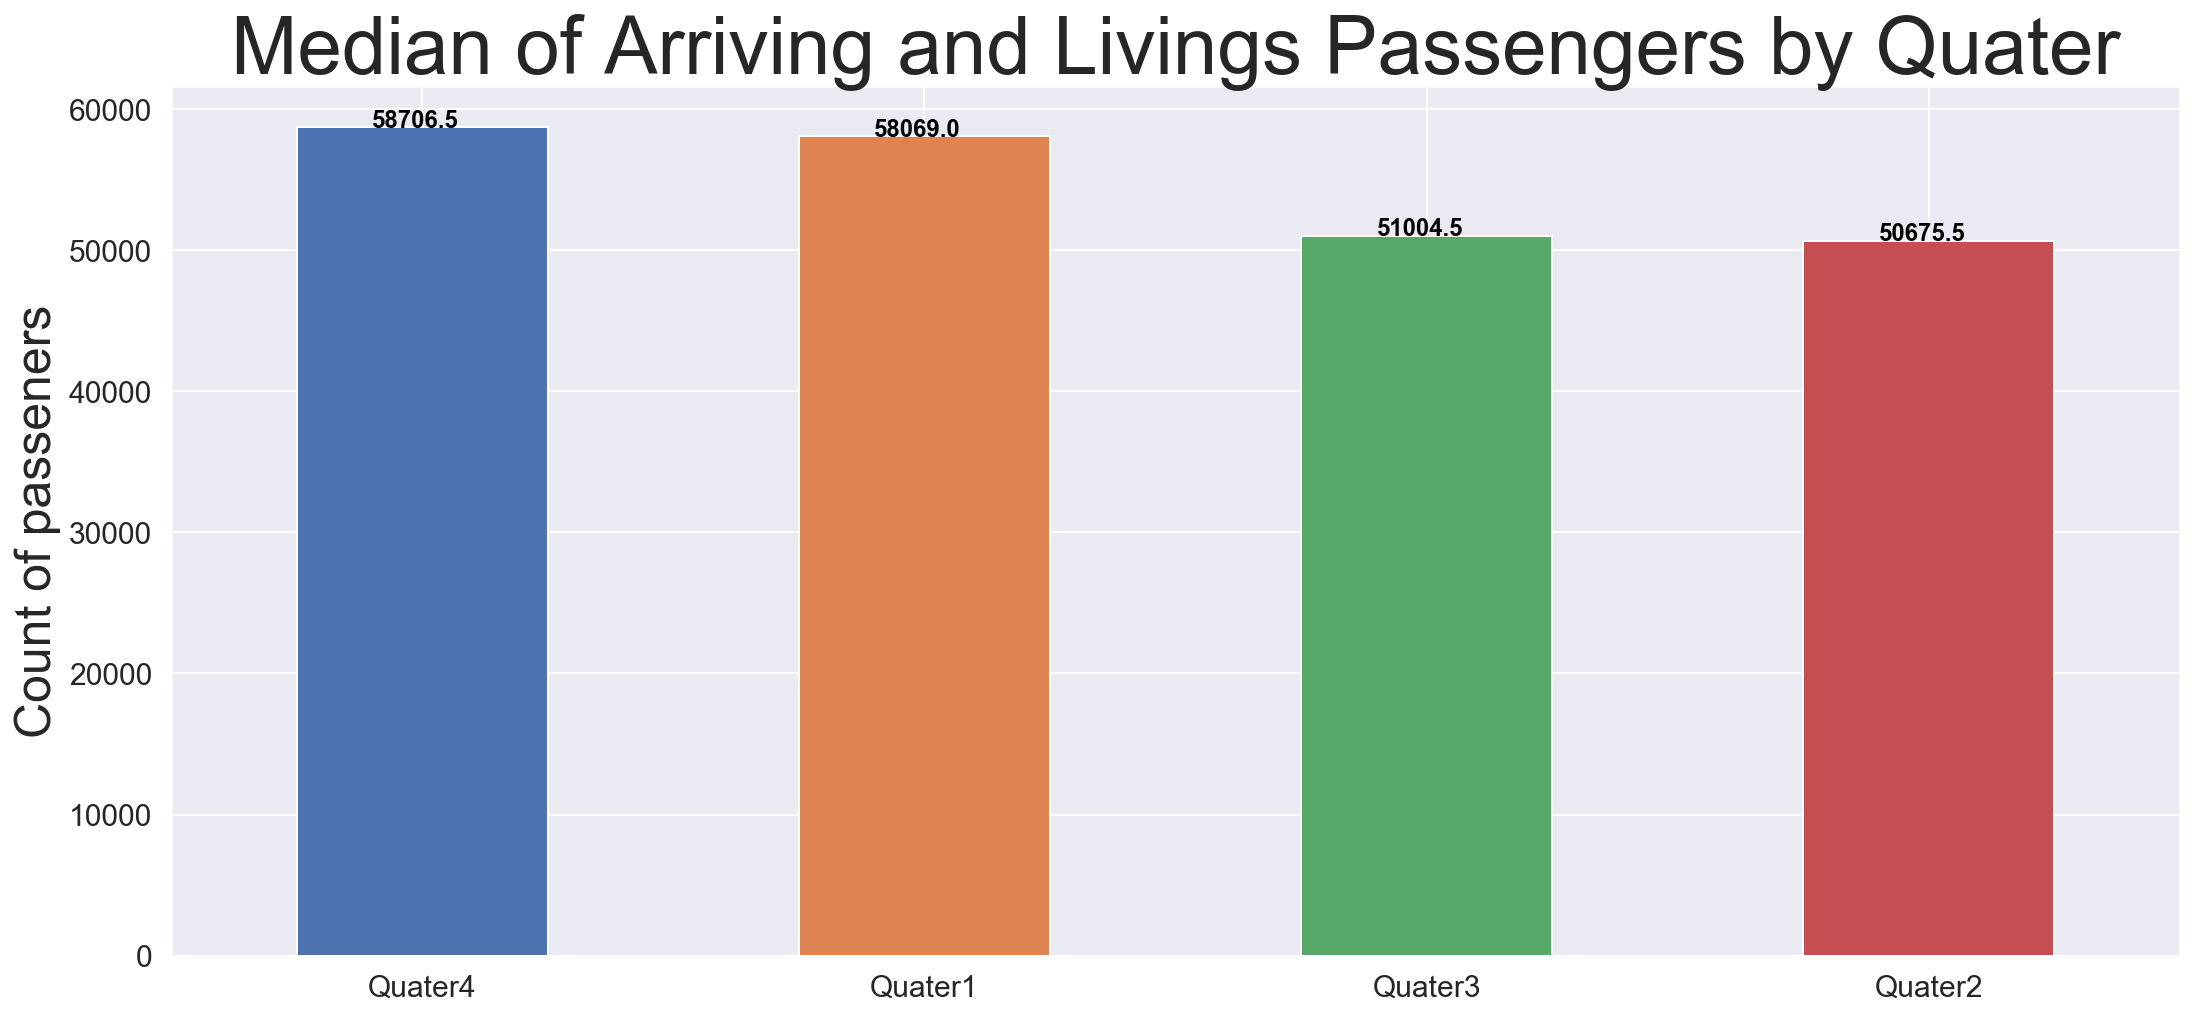

In [92]:
plot_summary_best_seasonal_passagers(df_peru_airtport,3,'Quater',)

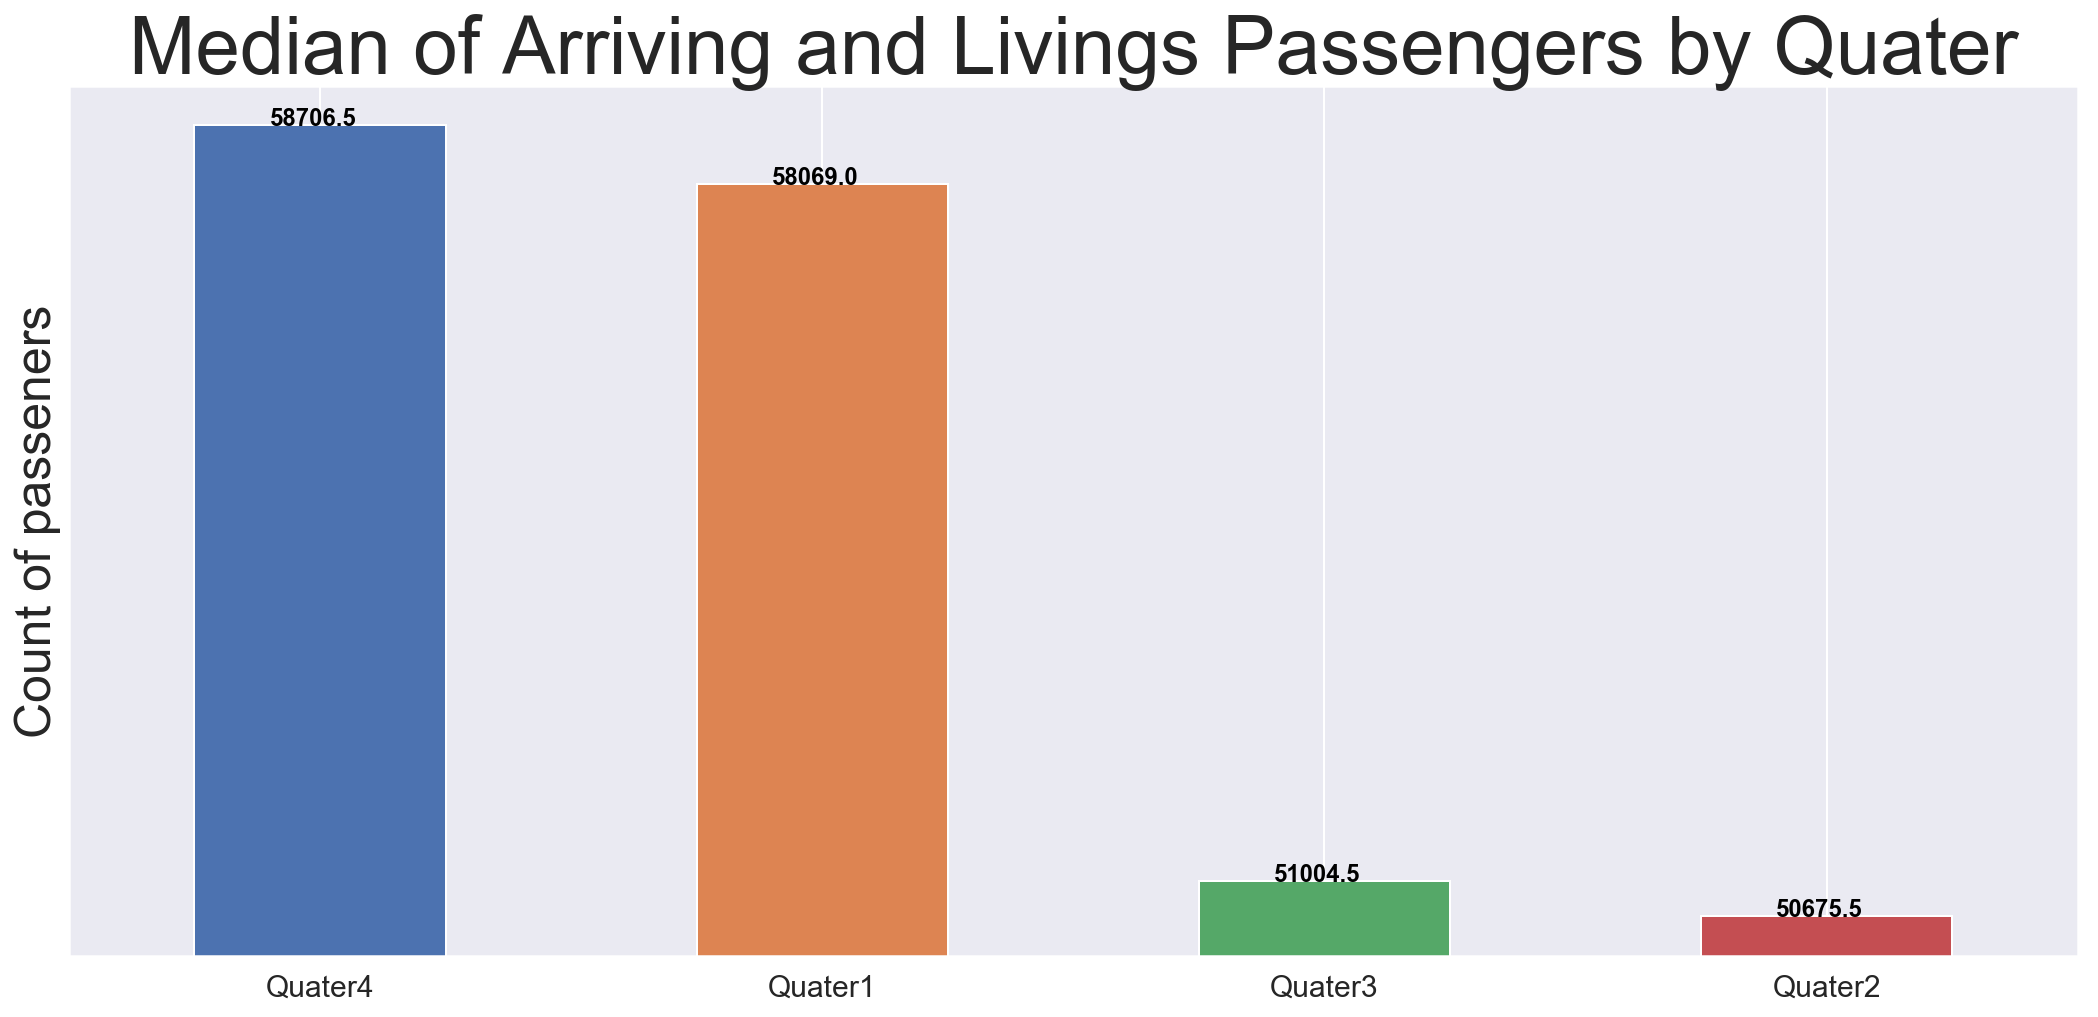

In [93]:
plot_summary_best_seasonal_passagers(df_peru_airtport,3,'Quater',scale='log')

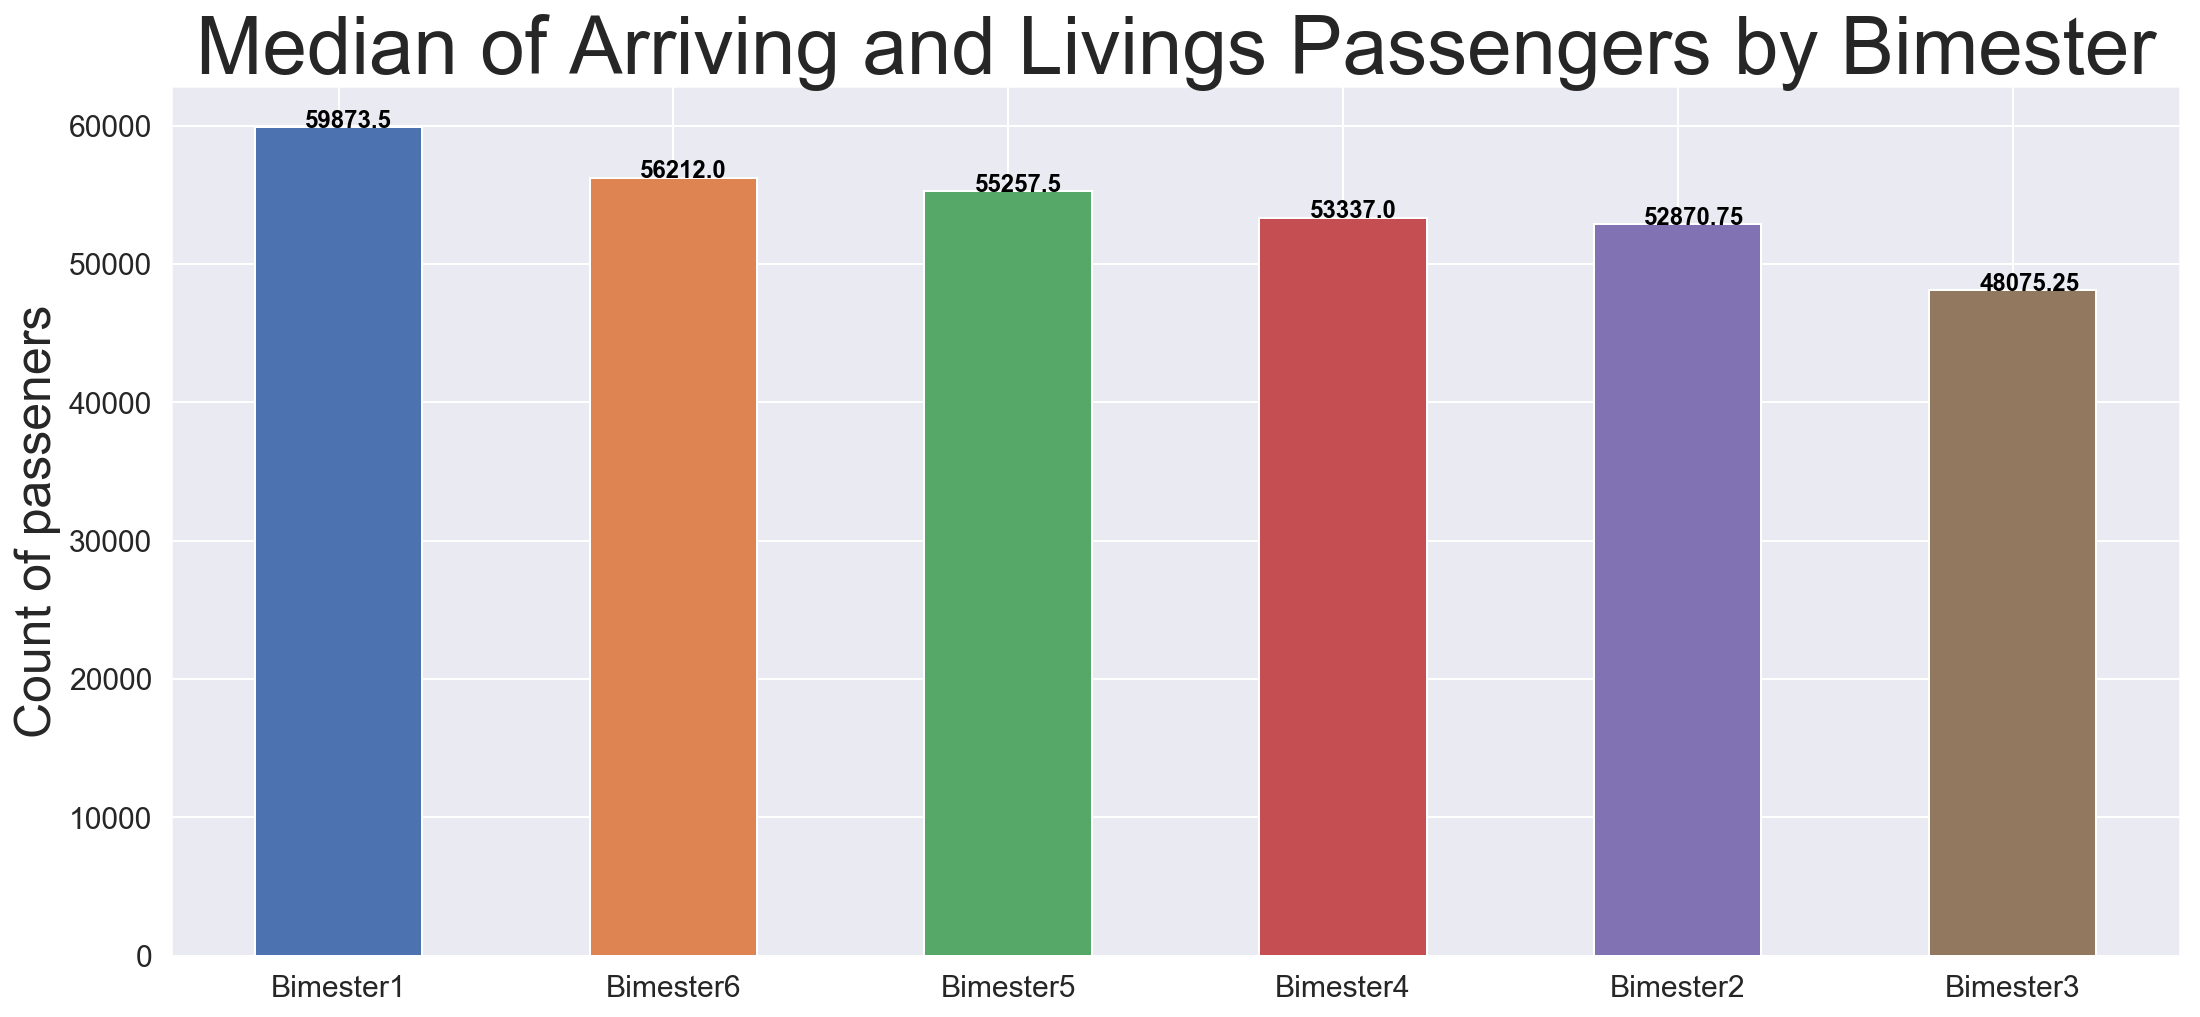

In [94]:
plot_summary_best_seasonal_passagers(df_peru_airtport,2,'Bimester',)

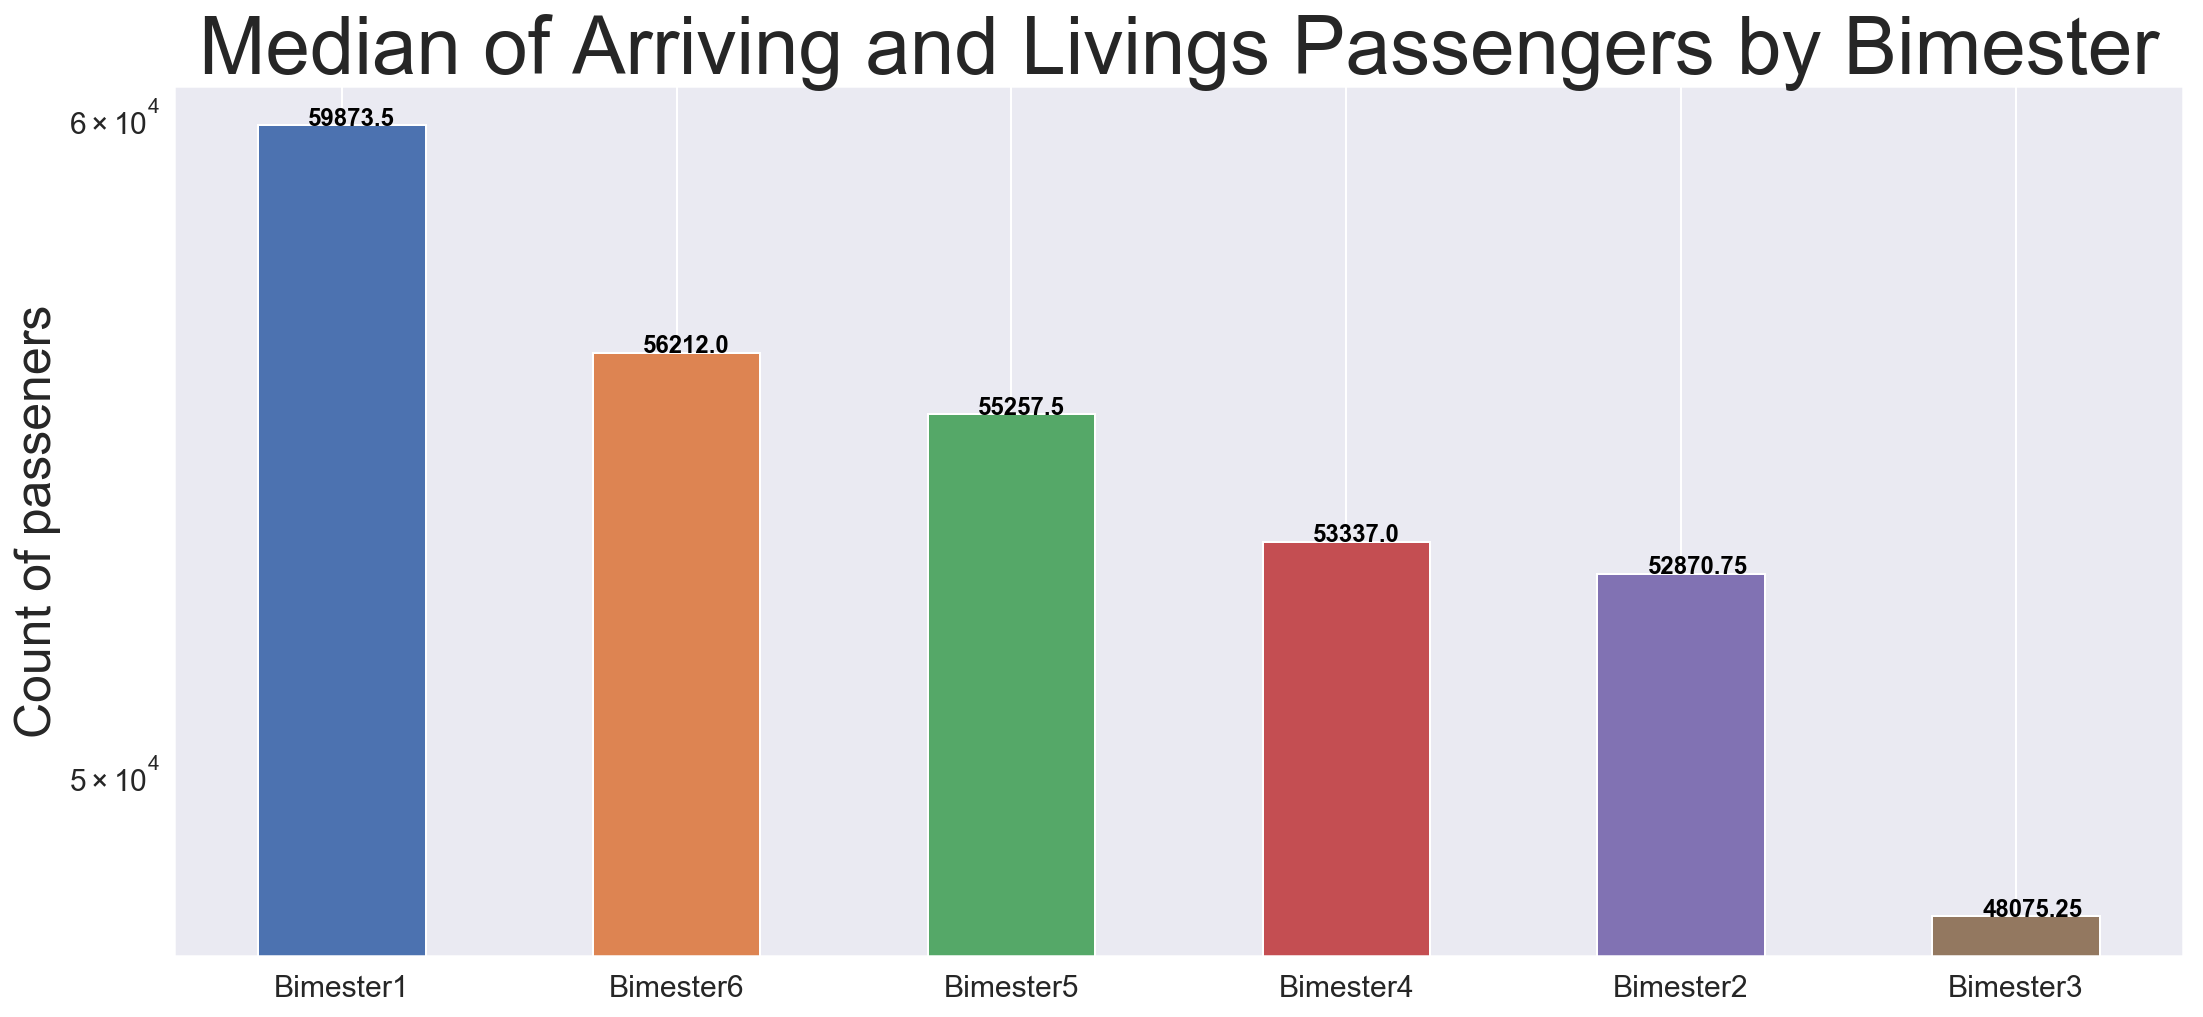

In [95]:
plot_summary_best_seasonal_passagers(df_peru_airtport,2,'Bimester','log')

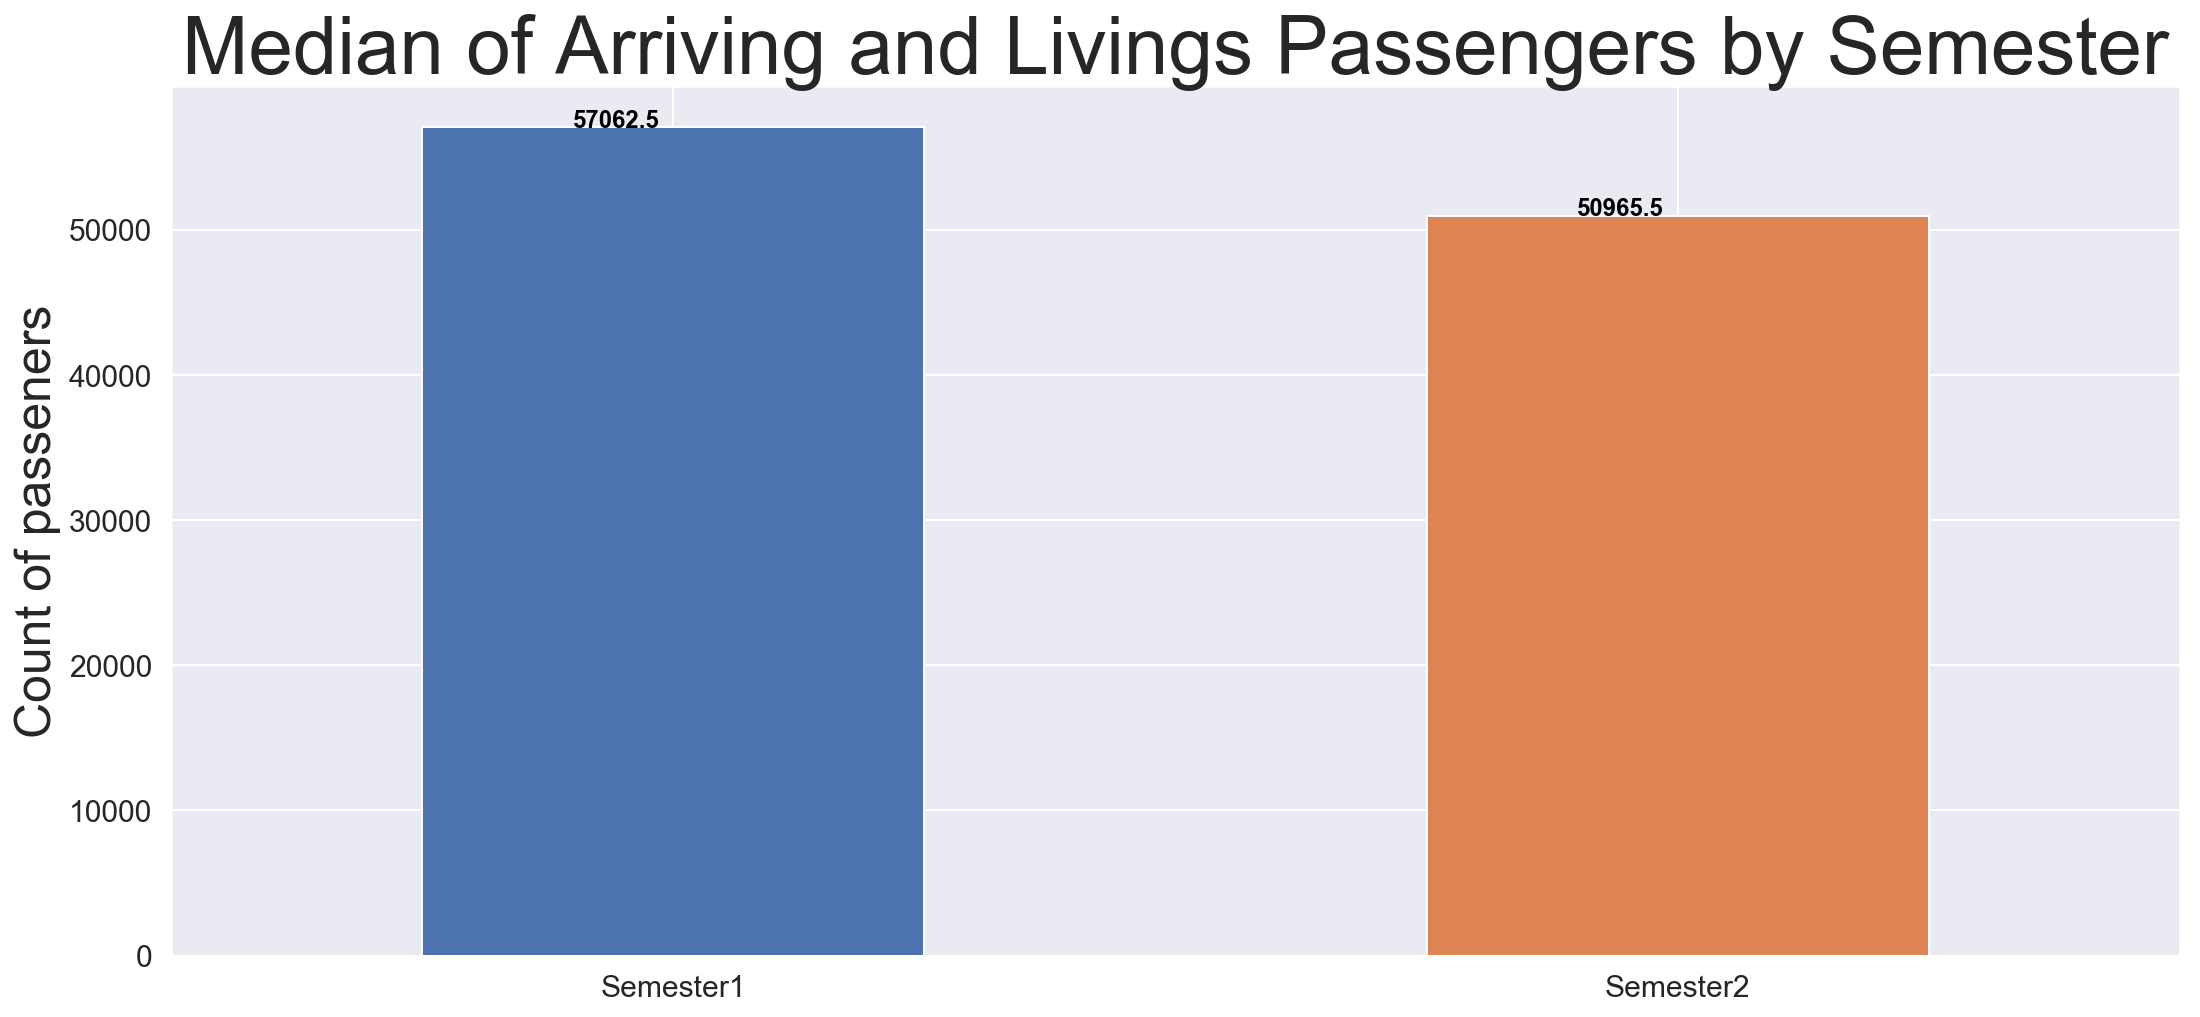

In [96]:
plot_summary_best_seasonal_passagers(df_peru_airtport,6,'Semester',)

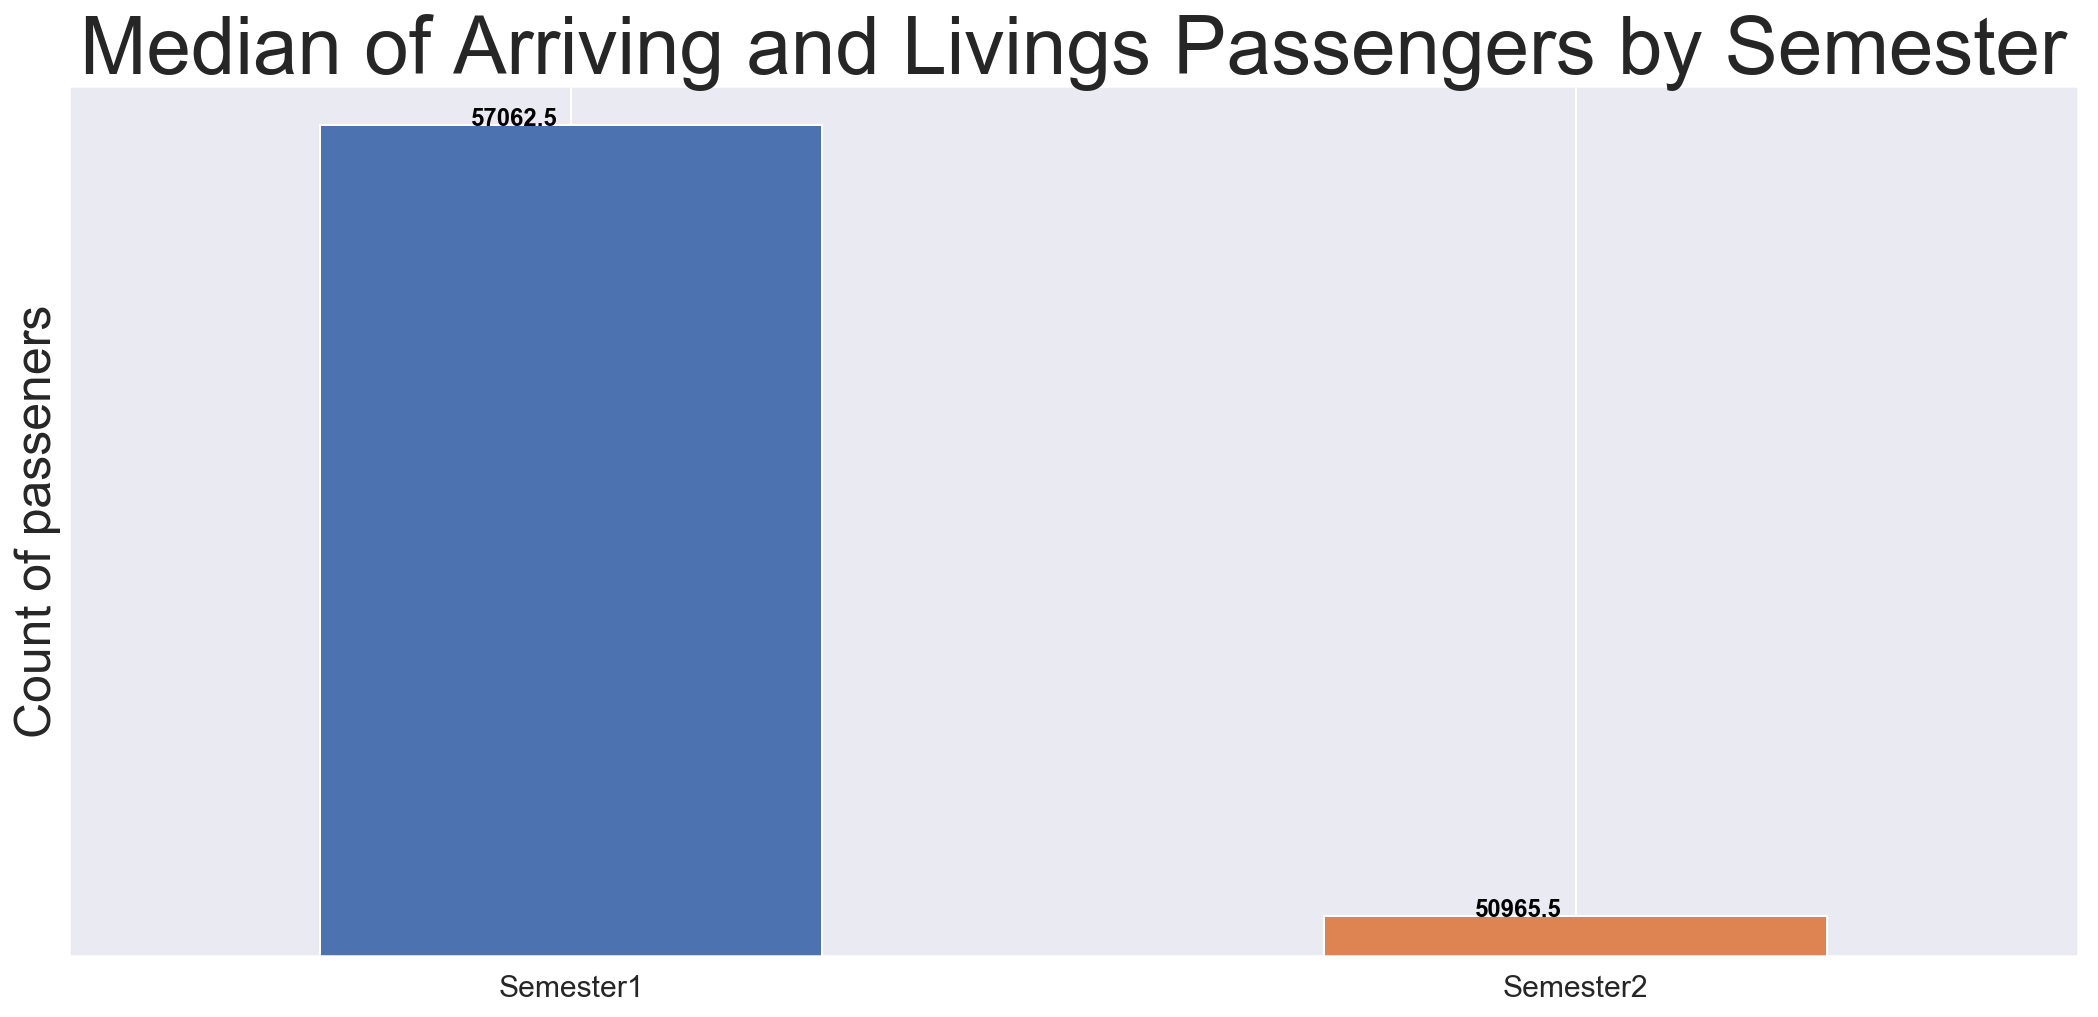

In [97]:
plot_summary_best_seasonal_passagers(df_peru_airtport,6,'Semester','log')